<a href="https://colab.research.google.com/github/JozefV99/Master-Thesis/blob/main/experiments/EXPERIMENT_1_YOLOv8l_LOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPERIMENT 1 - YOLOv8l - LOW**

This code trains the YOLOv8l model on the low complexity dataset, providing training, validation, and testing results, including visualizations. Testing results are based on both synthetic and traditional datasets.

# **IMPORT TRAINING DATASET:**

In [ ]:
from google.colab import drive
import os
import zipfile

# Mount Google Drive
drive.mount('/content/gdrive')

# Path to folder on Google Drive
path_to_folder = "/content/gdrive/My Drive/Colab Notebooks/Data/LOW COMPLEXITY/YOLO DATASET"

# Create a main folder called 'Datasets'
images_folder_path = '/content/Datasets'
os.makedirs(images_folder_path, exist_ok=True)

# Unzipping each zip file into a separate subfolder within 'Datasets'
for zip_file in os.listdir(path_to_folder):
    if zip_file.endswith('.zip'):
        # Create a directory named after the zip file (without the .zip extension)
        # within the 'Datasets' folder
        folder_name = zip_file[:-4]
        subfolder_path = os.path.join(images_folder_path, folder_name)
        os.makedirs(subfolder_path, exist_ok=True)

        # Path to the zip file in Google Drive
        zip_path = os.path.join(path_to_folder, zip_file)

        # Unzip the files into the newly created subfolder
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(subfolder_path)

print("Unzipping complete.")

# Print the final directory structure for verification
print("Contents of the 'Datasets' directory:")
!ls {images_folder_path}

Mounted at /content/gdrive
Unzipping complete.
Contents of the 'Datasets' directory:
training  validation


In [ ]:
import os

def count_files_in_directory(directory_path):
    # Initialize counters
    total_files = 0
    image_files = 0
    other_files = 0
    other_file_types = {}

    # Supported image file extensions
    image_extensions = {'.png', '.jpg', '.jpeg'}

    # Iterate through files in the directory
    for file in os.listdir(directory_path):
        if os.path.isfile(os.path.join(directory_path, file)):
            total_files += 1
            file_extension = os.path.splitext(file)[1].lower()  # Extract file extension

            # Check file extension
            if file_extension in image_extensions:
                image_files += 1
            else:
                other_files += 1
                if file_extension in other_file_types:
                    other_file_types[file_extension] += 1
                else:
                    other_file_types[file_extension] = 1

    return total_files, image_files, other_files, other_file_types

# Specify the directory to check
directory_path = '/content/Datasets/training'

# Count the files
total_files, image_files, other_files, other_file_types = count_files_in_directory(directory_path)

# Print the counts
print(f"Total files: {total_files}")
print(f"Number of image files: {image_files}")
print(f"Number of other files: {other_files}")
print("Other file types:")
for ext, count in other_file_types.items():
    print(f"{ext}: {count}")

Total files: 80000
Number of image files: 40000
Number of other files: 40000
Other file types:
.txt: 40000


# **IMPORT TESTING DATASET:**

### **SYNTHETIC TESTING DATASET:**

In [ ]:
import os
import shutil
import zipfile
import numpy as np
from PIL import Image
from google.colab import drive

# Mount Google Drive
#drive.mount('/content/gdrive')

def normalize_and_save(img_path, save_path):
    # Open the image file
    img = Image.open(img_path)
    img = img.convert('RGB')  # Convert to RGB if not already

    # Normalize pixel values to [0, 1] and scale back to [0, 255]
    np_img = np.array(img) / 255.0
    norm_img = Image.fromarray((np_img * 255).astype('uint8'))
    norm_img.save(save_path)
    os.remove(img_path)  # Optionally remove the original image

def extract_and_normalize_images(source_folder, target_folder):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    for zip_filename in os.listdir(source_folder):
        if zip_filename.endswith('.zip'):
            zip_path = os.path.join(source_folder, zip_filename)
            with zipfile.ZipFile(zip_path, 'r') as zip_file:
                zip_file.extractall(target_folder)
                print(f"Extracted {zip_filename} into {target_folder}")

                # Normalize each image extracted
                for filename in os.listdir(target_folder):
                    file_path = os.path.join(target_folder, filename)
                    if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                        normalize_and_save(file_path, file_path)  # Save normalized image over the original

# Specify the source directory where the zips are located and the target directory
test_source = "/content/gdrive/MyDrive/Colab Notebooks/Data/SYNTHETIC TESTING DATASET/LOW COMPLEXITY"
test_target = '/content/TestImages'

# Extract and normalize test set
extract_and_normalize_images(test_source, test_target)

def find_deepest_image_directory(root_folder):
    image_extensions = {'.png', '.jpg', '.jpeg'}  # Extensions to look for
    deepest_dir = None
    max_depth = -1
    directory_depths = {}

    # Walk through all directories and files in the root folder
    for dirpath, dirnames, filenames in os.walk(root_folder):
        # Determine the depth of the current directory
        depth = dirpath.count(os.sep)
        directory_depths[dirpath] = depth

        # Check if there are any image files in this directory
        if any(file.lower().endswith(tuple(image_extensions)) for file in filenames):
            # Update the deepest directory info if this one is deeper
            if depth > max_depth:
                deepest_dir = dirpath
                max_depth = depth

    # Ensure the deepest directory found doesn't have any subdirectories with images
    if deepest_dir:
        for subdir in os.listdir(deepest_dir):
            subdir_path = os.path.join(deepest_dir, subdir)
            if os.path.isdir(subdir_path) and any(file.lower().endswith(tuple(image_extensions)) for file in os.listdir(subdir_path)):
                return None  # Found a subdirectory with images, return None

    return deepest_dir

# Get the deepest directory containing images
deepest_image_directory = find_deepest_image_directory(test_target)

def move_and_cleanup(original_folder, new_folder):
    if not os.path.exists(new_folder):
        os.makedirs(new_folder)

    # Move each file to the new folder
    for filename in os.listdir(original_folder):
        file_path = os.path.join(original_folder, filename)
        if os.path.isfile(file_path):
            shutil.move(file_path, os.path.join(new_folder, filename))

    # Remove the original folder
    shutil.rmtree(original_folder)
    shutil.rmtree(test_target)
    print(f"Moved all images to {new_folder} and deleted the original folder {original_folder}")

# Move the normalized images to a new directory and cleanup
final_destination = '/content/Datasets/testing'
move_and_cleanup(deepest_image_directory, final_destination)

# Print the final directory structure for verification
print("Contents of the 'Datasets' directory:")
print(os.listdir('/content/Datasets'))

Extracted RESIZED (MIXED).zip into /content/TestImages
Moved all images to /content/Datasets/testing and deleted the original folder /content/TestImages/RESIZED (MIXED)
Contents of the 'Datasets' directory:
['training', 'testing', 'validation']


In [ ]:
# GET ANNOTATIONS:

from google.colab import drive
import zipfile
import os

# Mount Google Drive
#drive.mount('/content/drive')

# Define paths
zip_file_path = '/content/gdrive/MyDrive/Colab Notebooks/Data/SYNTHETIC TESTING DATASET/LOW COMPLEXITY/Annotations/LOW COMPLEXITY_Annotations.zip'
extract_dir = '/content/Datasets/synthetic_annotations'

# Create the extraction directory if it does not exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction completed.")

Extraction completed.


In [ ]:
from google.colab import drive
import shutil
import os

# Mount Google Drive
#drive.mount('/content/drive')

# Define the paths to the original folders and the new folder
folder1 = '/content/Datasets/testing'
folder2 = '/content/Datasets/synthetic_annotations'
new_folder = '/content/Datasets/synthetic_testing'

# Create the new folder if it doesn't exist
os.makedirs(new_folder, exist_ok=True)

# Copy the contents of folder1 to the new folder
for item in os.listdir(folder1):
    source = os.path.join(folder1, item)
    destination = os.path.join(new_folder, item)
    if os.path.isdir(source):
        shutil.copytree(source, destination)
    else:
        shutil.copy2(source, destination)

# Copy the contents of folder2 to the new folder
for item in os.listdir(folder2):
    source = os.path.join(folder2, item)
    destination = os.path.join(new_folder, item)
    if os.path.isdir(source):
        shutil.copytree(source, destination)
    else:
        shutil.copy2(source, destination)

# Delete the original folders
shutil.rmtree(folder1)
shutil.rmtree(folder2)

print(f'Folders {folder1} and {folder2} have been merged into {new_folder} and deleted.')

Folders /content/Datasets/testing and /content/Datasets/synthetic_annotations have been merged into /content/Datasets/synthetic_testing and deleted.


### **REAL TESTING DATASET:**

In [ ]:
import os
import shutil
import zipfile
import numpy as np
from PIL import Image
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

def normalize_and_save(img_path, save_path):
    # Open the image file
    img = Image.open(img_path)
    img = img.convert('RGB')  # Convert to RGB if not already

    # Normalize pixel values to [0, 1] and scale back to [0, 255]
    np_img = np.array(img) / 255.0
    norm_img = Image.fromarray((np_img * 255).astype('uint8'))
    norm_img.save(save_path)
    os.remove(img_path)  # Optionally remove the original image

def extract_and_normalize_images(source_folder, target_folder):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    for zip_filename in os.listdir(source_folder):
        if zip_filename.endswith('.zip'):
            zip_path = os.path.join(source_folder, zip_filename)
            with zipfile.ZipFile(zip_path, 'r') as zip_file:
                zip_file.extractall(target_folder)
                print(f"Extracted {zip_filename} into {target_folder}")

                # Normalize each image extracted
                for filename in os.listdir(target_folder):
                    file_path = os.path.join(target_folder, filename)
                    if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                        normalize_and_save(file_path, file_path)  # Save normalized image over the original

# Specify the source directory where the zips are located and the target directory
test_source = "/content/gdrive/MyDrive/Colab Notebooks/Data/Internet testing"
test_target = '/content/TestImages'

# Extract and normalize test set
extract_and_normalize_images(test_source, test_target)

def find_deepest_image_directory(root_folder):
    image_extensions = {'.png', '.jpg', '.jpeg'}  # Extensions to look for
    deepest_dir = None
    max_depth = -1
    directory_depths = {}

    # Walk through all directories and files in the root folder
    for dirpath, dirnames, filenames in os.walk(root_folder):
        # Determine the depth of the current directory
        depth = dirpath.count(os.sep)
        directory_depths[dirpath] = depth

        # Check if there are any image files in this directory
        if any(file.lower().endswith(tuple(image_extensions)) for file in filenames):
            # Update the deepest directory info if this one is deeper
            if depth > max_depth:
                deepest_dir = dirpath
                max_depth = depth

    # Ensure the deepest directory found doesn't have any subdirectories with images
    if deepest_dir:
        for subdir in os.listdir(deepest_dir):
            subdir_path = os.path.join(deepest_dir, subdir)
            if os.path.isdir(subdir_path) and any(file.lower().endswith(tuple(image_extensions)) for file in os.listdir(subdir_path)):
                return None  # Found a subdirectory with images, return None

    return deepest_dir

# Get the deepest directory containing images
deepest_image_directory = find_deepest_image_directory(test_target)

def move_and_cleanup(original_folder, new_folder):
    if not os.path.exists(new_folder):
        os.makedirs(new_folder)

    # Move each file to the new folder
    for filename in os.listdir(original_folder):
        file_path = os.path.join(original_folder, filename)
        if os.path.isfile(file_path):
            shutil.move(file_path, os.path.join(new_folder, filename))

    # Remove the original folder
    shutil.rmtree(original_folder)
    shutil.rmtree(test_target)
    print(f"Moved all images to {new_folder} and deleted the original folder {original_folder}")

# Move the normalized images to a new directory and cleanup
final_destination = '/content/Datasets/actual_testing'
move_and_cleanup(deepest_image_directory, final_destination)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Extracted Testing pictures.zip into /content/TestImages
Moved all images to /content/Datasets/actual_testing and deleted the original folder /content/TestImages/ALL


# **MODEL TRAINING:**

In [ ]:
# Install Ultralytics library
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.9/777.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 76.7 MB/s eta 0:00:00


In [ ]:
# Copy the YOLOv8l pretrained model from the Hugging Face repository
!wget -O /content/yolov8l.pt "https://huggingface.co/Ultralytics/YOLOv8/resolve/main/yolov8l.pt?download=true"

--2024-05-18 21:17:25--  https://huggingface.co/Ultralytics/YOLOv8/resolve/main/yolov8l.pt?download=true
Resolving huggingface.co (huggingface.co)... 18.239.50.49, 18.239.50.103, 18.239.50.16, ...
Connecting to huggingface.co (huggingface.co)|18.239.50.49|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.huggingface.co/repos/9e/8d/9e8dd75370f01a34258392c77f574a3ff65cc9c024fd9c240f70b97048535cb9/18218ea4798da042d9862e6029ca9531adbd40ace19b6c9a75e2e28f1adf30cc?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27yolov8l.pt%3B+filename%3D%22yolov8l.pt%22%3B&Expires=1716326245&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxNjMyNjI0NX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzllLzhkLzllOGRkNzUzNzBmMDFhMzQyNTgzOTJjNzdmNTc0YTNmZjY1Y2M5YzAyNGZkOWMyNDBmNzBiOTcwNDg1MzVjYjkvMTgyMThlYTQ3OThkYTA0MmQ5ODYyZTYwMjljYTk1MzFhZGJkNDBhY2UxOWI2YzlhNzVlMmUyOGYxYWRmMzBjYz

In [ ]:
# Define and save yaml file
data_yaml_content = """
train: /content/Datasets/training
val: /content/Datasets/validation

nc: 5
names: ['D1098590', 'D1100844', 'D1612695', 'D1899542', 'D4332268']
"""

with open('/content/Datasets/data.yaml', 'w') as file:
    file.write(data_yaml_content)

In [ ]:
from ultralytics import YOLO
from google.colab import drive
import os
import glob

# Load a pretrained model
model = YOLO("yolov8l.pt")

# Specify training parameters
data_path = '/content/Datasets/data.yaml'
epochs = 20
img_size = 640  # Image size
batch_size = 2  # Batch size

# Train the model
results = model.train(data=data_path, epochs=epochs, imgsz=img_size, batch=batch_size)

# Find the latest run directory
runs_dir = '/content/runs/detect/'
latest_run_dir = max(glob.glob(os.path.join(runs_dir, 'train*')), key=os.path.getmtime)

# Path to the latest model weights
latest_model_path = os.path.join(latest_run_dir, 'weights', 'best.pt')

# Reload the trained model
model = YOLO(latest_model_path)

# Save directory on Google Drive
drive.mount('/content/gdrive')
save_dir = '/content/gdrive/MyDrive/Colab Notebooks/Data/LOW COMPLEXITY - Fully trained model/YOLOv8l/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Define the path to save the model on Google Drive
drive_model_path = os.path.join(save_dir, 'full_trained_model_YOLOv8l_low_T4.pt')

# Save the reloaded model to Google Drive
model.save(drive_model_path)
print(f"Model saved to: {drive_model_path}")

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/Datasets/data.yaml, epochs=20, time=None, patience=100, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 39.4MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 186MB/s]


AMP: checks passed ✅


train: Scanning /content/Datasets/training... 40000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40000/40000 [00:27<00:00, 1432.91it/s]


train: New cache created: /content/Datasets/training.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/Datasets/validation... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:06<00:00, 1470.81it/s]


val: New cache created: /content/Datasets/validation.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.72G     0.4633      0.671      1.088          3        640: 100%|██████████| 20000/20000 [43:17<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:41<00:00, 11.29it/s]

                   all      10000      10000      0.868      0.829      0.884      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.35G     0.4856      0.499       1.09          8        640: 100%|██████████| 20000/20000 [41:56<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:41<00:00, 11.30it/s]

                   all      10000      10000      0.984      0.976      0.989      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.36G     0.5127     0.5303      1.108          2        640: 100%|██████████| 20000/20000 [41:27<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:39<00:00, 11.37it/s]

                   all      10000      10000      0.984      0.988      0.992       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.35G     0.5022     0.4988      1.105          5        640: 100%|██████████| 20000/20000 [41:12<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:39<00:00, 11.36it/s]

                   all      10000      10000      0.987      0.986      0.993      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.36G     0.4543     0.4205      1.081          3        640: 100%|██████████| 20000/20000 [41:17<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:39<00:00, 11.37it/s]

                   all      10000      10000       0.99      0.994      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.36G     0.4236     0.3742      1.064          6        640: 100%|██████████| 20000/20000 [41:12<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:40<00:00, 11.31it/s]

                   all      10000      10000      0.976      0.972      0.986      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.35G     0.3993     0.3507      1.046          3        640: 100%|██████████| 20000/20000 [41:33<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:41<00:00, 11.29it/s]

                   all      10000      10000      0.992      0.995      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.36G     0.3782     0.3265      1.039          2        640: 100%|██████████| 20000/20000 [41:38<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:42<00:00, 11.24it/s]

                   all      10000      10000       0.99      0.996      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.36G     0.3625     0.3072      1.026          2        640: 100%|██████████| 20000/20000 [41:13<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:40<00:00, 11.35it/s]

                   all      10000      10000      0.992      0.994      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.36G     0.3471     0.2891      1.017          5        640: 100%|██████████| 20000/20000 [41:12<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:40<00:00, 11.35it/s]

                   all      10000      10000      0.993      0.995      0.995      0.988


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.36G      0.168     0.1636     0.8326          2        640: 100%|██████████| 20000/20000 [41:20<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:40<00:00, 11.32it/s]

                   all      10000      10000      0.994      0.996      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.36G     0.1566     0.1503     0.8243          2        640: 100%|██████████| 20000/20000 [41:18<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:40<00:00, 11.33it/s]

                   all      10000      10000      0.995      0.996      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.36G     0.1447       0.14     0.8146          2        640: 100%|██████████| 20000/20000 [41:12<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:40<00:00, 11.34it/s]

                   all      10000      10000      0.961      0.977      0.986      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.36G      0.134     0.1291     0.8131          2        640: 100%|██████████| 20000/20000 [41:38<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:40<00:00, 11.33it/s]

                   all      10000      10000      0.996      0.996      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.35G     0.1289     0.1208     0.8085          2        640: 100%|██████████| 20000/20000 [41:11<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:40<00:00, 11.35it/s]

                   all      10000      10000      0.995      0.998      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.36G     0.1195     0.1119     0.8061          2        640: 100%|██████████| 20000/20000 [41:44<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:43<00:00, 11.18it/s]

                   all      10000      10000      0.996      0.997      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.36G     0.1117     0.1055     0.8025          2        640: 100%|██████████| 20000/20000 [41:32<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:41<00:00, 11.31it/s]

                   all      10000      10000      0.997      0.996      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.36G     0.1052    0.09725     0.7971          2        640: 100%|██████████| 20000/20000 [41:11<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:40<00:00, 11.35it/s]

                   all      10000      10000      0.997      0.996      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.36G     0.0977    0.08819     0.7955          2        640: 100%|██████████| 20000/20000 [41:19<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:41<00:00, 11.29it/s]

                   all      10000      10000      0.996      0.997      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.36G    0.08875    0.07944     0.7912          2        640: 100%|██████████| 20000/20000 [41:28<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:44<00:00, 11.12it/s]

                   all      10000      10000      0.996      0.997      0.995      0.992



20 epochs completed in 15.078 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43610463 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:18<00:00, 12.58it/s]


                   all      10000      10000      0.996      0.997      0.995      0.992
              D1098590      10000       1947      0.996      0.996      0.995      0.994
              D1100844      10000       1999          1          1      0.995      0.995
              D1612695      10000       2004      0.998      0.998      0.995      0.993
              D1899542      10000       2033      0.992      0.996      0.995      0.987
              D4332268      10000       2017      0.996      0.994      0.995      0.991
Speed: 0.2ms preprocess, 16.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Model saved to: /content/gdrive/MyDrive/Colab Notebooks/Data/LOW COMPLEXITY - Fully trained model/YOLOv8l/full_trained_model_YOLOv8l_low_T4.pt


In [ ]:
import os
import glob
import shutil
from google.colab import drive

# Path to the runs directory
runs_dir = '/content/runs/detect/'

# Find the latest run directory
latest_run_dir = max(glob.glob(os.path.join(runs_dir, 'train*')), key=os.path.getmtime)

# Path to the latest results.csv file
results_file_path = os.path.join(latest_run_dir, 'results.csv')

# Save directory on Google Drive
drive_save_dir = '/content/gdrive/MyDrive/Colab Notebooks/Data/LOW COMPLEXITY - Fully trained model/YOLOv8l/'
if not os.path.exists(drive_save_dir):
    os.makedirs(drive_save_dir)

# Define the path to save the results file on Google Drive
drive_results_path = os.path.join(drive_save_dir, 'results_latest_train.csv')

# Copy the results.csv file to Google Drive
shutil.copy(results_file_path, drive_results_path)
print(f"Results file copied to: {drive_results_path}")

Results file copied to: /content/gdrive/MyDrive/Colab Notebooks/Data/LOW COMPLEXITY - Fully trained model/YOLOv8l/results_latest_train.csv


### **PLOT RESULTS:**

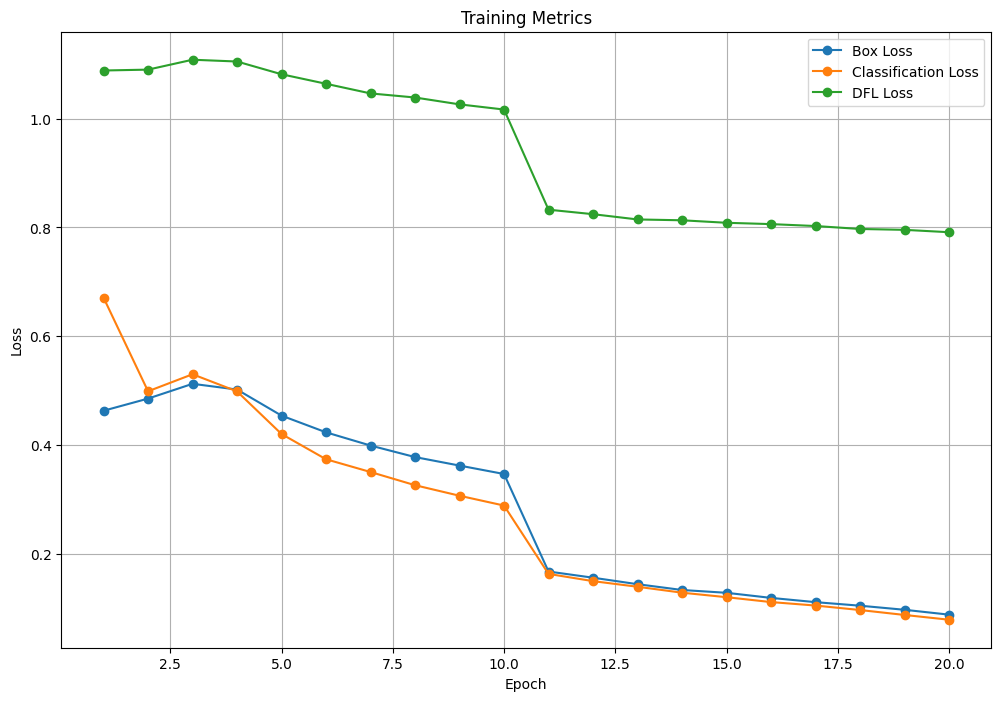

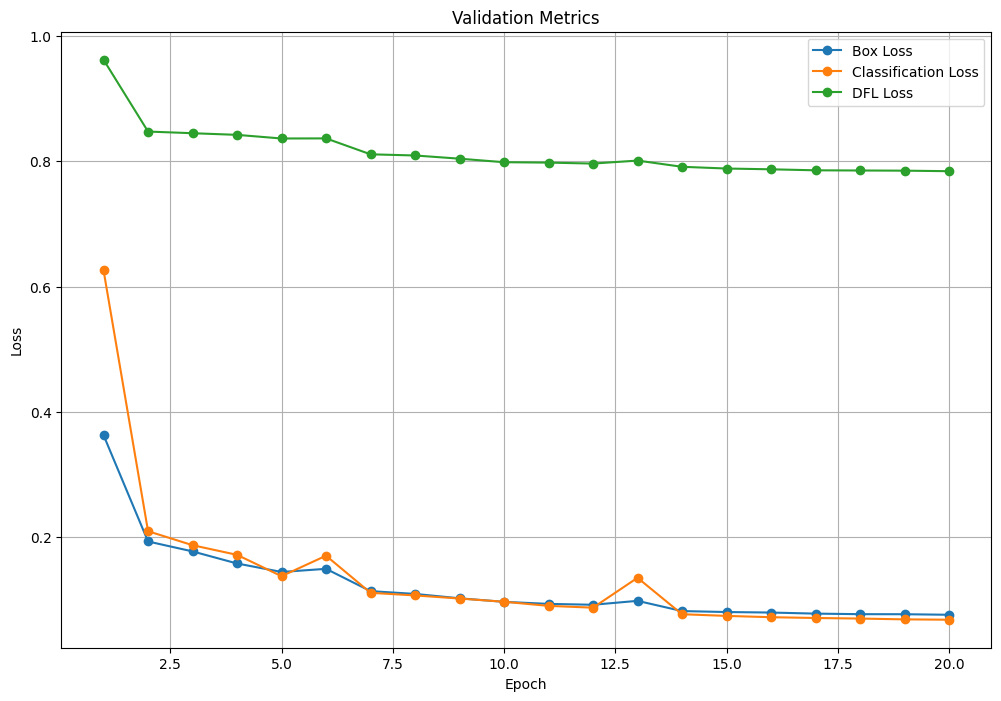

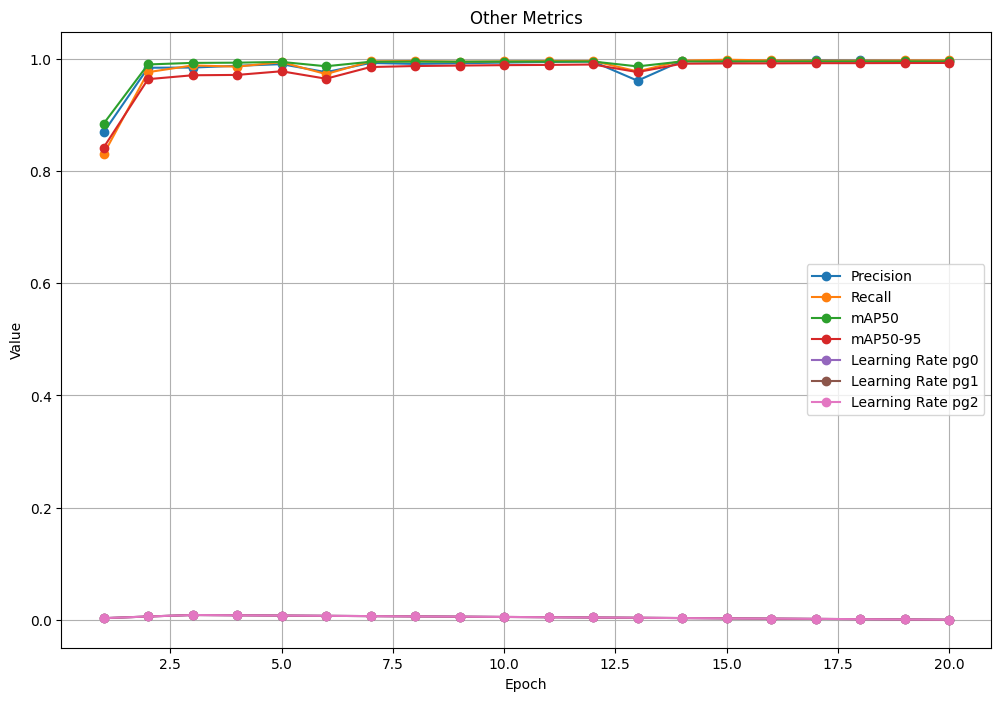

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
csv_file_path = '/content/gdrive/MyDrive/Colab Notebooks/Data/LOW COMPLEXITY - Fully trained model/YOLOv8l/results_latest_train.csv'
df = pd.read_csv(csv_file_path)

# Strip any leading or trailing spaces from the column names
df.columns = df.columns.str.strip()

# Plotting function for metrics
def plot_metrics(df, metrics, title, ylabel, xlabel='Epoch', save_path=None):
    plt.figure(figsize=(12, 8))
    for metric, label in metrics:
        plt.plot(df['epoch'], df[metric], marker='o', linestyle='-', label=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Training metrics to plot
training_metrics = [
    ('train/box_loss', 'Box Loss'),
    ('train/cls_loss', 'Classification Loss'),
    ('train/dfl_loss', 'DFL Loss'),
]

# Validation metrics to plot
validation_metrics = [
    ('val/box_loss', 'Box Loss'),
    ('val/cls_loss', 'Classification Loss'),
    ('val/dfl_loss', 'DFL Loss'),
]

# Other metrics to plot
other_metrics = [
    ('metrics/precision(B)', 'Precision'),
    ('metrics/recall(B)', 'Recall'),
    ('metrics/mAP50(B)', 'mAP50'),
    ('metrics/mAP50-95(B)', 'mAP50-95'),
    ('lr/pg0', 'Learning Rate pg0'),
    ('lr/pg1', 'Learning Rate pg1'),
    ('lr/pg2', 'Learning Rate pg2')
]

# Plot training metrics
plot_metrics(df, training_metrics, 'Training Metrics', 'Loss')

# Plot validation metrics
plot_metrics(df, validation_metrics, 'Validation Metrics', 'Loss')

# Plot other metrics
plot_metrics(df, other_metrics, 'Other Metrics', 'Value')

In [ ]:
# SAVE RUNS INTO GOOGLE DRIVE

import os
import shutil
from google.colab import drive

# Source directory
source_dir = '/content/runs'

# Destination directory on Google Drive
destination_dir = '/content/gdrive/MyDrive/Colab Notebooks/Data/LOW COMPLEXITY - Fully trained model/YOLOv8l'

# Create the destination directory if it does not exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Copy the entire folder to Google Drive
shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)
print(f"Folder copied to: {destination_dir}")

Folder copied to: /content/gdrive/MyDrive/Colab Notebooks/Data/LOW COMPLEXITY - Fully trained model/YOLOv8l


#**INFERENCE:**

### **SYNTHETIC TESTING DATASET:**

In [ ]:
# ANNOTATIONS:

from ultralytics import YOLO
import cv2
import os

# Load the pretrained YOLO model
model = YOLO('/content/gdrive/MyDrive/Colab Notebooks/Data/LOW COMPLEXITY - Fully trained model/YOLOv8l/full_trained_model_YOLOv8l_low_T4.pt')

# Path to the directory containing images
image_directory = '/content/Datasets/synthetic_testing'
output_directory = '/content/Datasets/synthetic_testing_results'

# Ensure output directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# List all image files in the directory
image_files = [f for f in os.listdir(image_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Process each image
for image_file in image_files:
    # Construct full image path
    image_path = os.path.join(image_directory, image_file)
    # Run inference on the image
    results = model(image_path)

    # Open a file to write the YOLO formatted annotations
    annotation_path = os.path.join(output_directory, image_file.rsplit('.', 1)[0] + '.txt')
    with open(annotation_path, 'w') as file:
        detections_found = False
        for result in results:
            if hasattr(result, 'boxes') and result.boxes.data.nelement() > 0:
                detections = result.boxes.data
                confidences = detections[:, 4]
                max_conf_index = confidences.argmax()
                best_detection = detections[max_conf_index]
                x1, y1, x2, y2, conf, cls_id = best_detection.int().tolist()

                # Normalize the bounding box coordinates
                img = cv2.imread(result.path)
                h, w, _ = img.shape
                x_center = ((x2 + x1) / 2) / w
                y_center = ((y2 + y1) / 2) / h
                width = (x2 - x1) / w
                height = (y2 - y1) / h

                # Write to file in YOLO format: class_id x_center y_center width height
                file.write(f"{cls_id} {x_center} {y_center} {width} {height}\n")
                detections_found = True

        if not detections_found:
            # Write "unidentified" if no detections were made
            file.write("unidentified\n")
            print(f"No bounding boxes found for {image_file}, wrote 'unidentified'.")


image 1/1 /content/Datasets/synthetic_testing/D1098590_186.png: 640x640 1 D1098590, 62.8ms
Speed: 1.5ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Datasets/synthetic_testing/D1612695_120.png: 640x640 1 D1612695, 62.8ms
Speed: 2.5ms preprocess, 62.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Datasets/synthetic_testing/D1100844_199.png: 640x640 1 D1100844, 45.2ms
Speed: 1.4ms preprocess, 45.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Datasets/synthetic_testing/D1098590_196.png: 640x640 1 D1098590, 41.6ms
Speed: 1.3ms preprocess, 41.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Datasets/synthetic_testing/D4332268_0.png: 640x640 1 D4332268, 40.7ms
Speed: 1.3ms preprocess, 40.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Datasets/synthetic_testing/D4332268_2

In [ ]:
import os
import numpy as np
from PIL import Image
from collections import defaultdict

# Mapping class names to IDs
class_mapping = {
    'D1098590': 0,
    'D1100844': 1,
    'D1612695': 2,
    'D1899542': 3,
    'D4332268': 4,
}

# Reverse the class mapping for easier lookup by class index
reverse_class_mapping = {v: k for k, v in class_mapping.items()}

def parse_yolo_annotation(txt_file, img_width, img_height):
  """Parse YOLO format annotation file to extract bounding boxes and labels."""
    boxes = []
    labels = []

    with open(txt_file, 'r') as f:
        for line in f:
            data = line.strip().split()
            try:
                label = int(data[0])
            except ValueError:
                print(f"Warning: Skipping invalid label '{data[0]}' in file {txt_file}")
                continue

            x_center = float(data[1]) * img_width
            y_center = float(data[2]) * img_height
            width = float(data[3]) * img_width
            height = float(data[4]) * img_height
            xmin = int(x_center - width / 2)
            ymin = int(y_center - height / 2)
            xmax = int(x_center + width / 2)
            ymax = int(y_center + height / 2)
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(label)

    return boxes, labels

def calculate_iou(box1, box2):
  """Calculate Intersection over Union (IoU) between two bounding boxes."""
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2

    inter_x_min = max(x1_min, x2_min)
    inter_y_min = max(y1_min, y2_min)
    inter_x_max = min(x1_max, x2_max)
    inter_y_max = min(y1_max, y2_max)

    if inter_x_max < inter_x_min or inter_y_max < inter_y_min:
        return 0.0

    inter_area = (inter_x_max - inter_x_min) * (inter_y_max - inter_y_min)
    box1_area = (x1_max - x1_min) * (y1_max - y1_min)
    box2_area = (x2_max - x2_min) * (y2_max - y2_min)

    iou = inter_area / float(box1_area + box2_area - inter_area)
    return iou

def compare_annotations(real_dir, inferred_dir, img_dir, iou_threshold=0.5):
  """Compare real and inferred annotations, calculating classification accuracy and IoU."""
    real_files = [f for f in os.listdir(real_dir) if f.endswith('.txt')]
    inferred_files = [f for f in os.listdir(inferred_dir) if f.endswith('.txt')]

    total_files = len(real_files)
    correct_classifications = defaultdict(int)
    incorrect_classifications = defaultdict(int)
    undetected_classifications = defaultdict(int)
    total_iou_per_class = defaultdict(float)
    total_matches_per_class = defaultdict(int)
    classes = set()

    for real_file in real_files:
        base_name = real_file.replace('.txt', '')
        inferred_file = base_name + '.txt'
        img_file = base_name + '.png'

        if inferred_file not in inferred_files:
            print(f"Skipping {real_file}: no corresponding inferred file")
            continue

        img_path = os.path.join(img_dir, img_file)
        if not os.path.exists(img_path):
            print(f"Skipping {real_file}: no corresponding image file")
            continue

        img = Image.open(img_path)
        img_width, img_height = img.size

        real_boxes, real_labels = parse_yolo_annotation(os.path.join(real_dir, real_file), img_width, img_height)
        inferred_boxes, inferred_labels = parse_yolo_annotation(os.path.join(inferred_dir, inferred_file), img_width, img_height)

        detected_real_boxes = set()

        for r_idx, (r_box, r_label) in enumerate(zip(real_boxes, real_labels)):
            classes.add(r_label)
            best_iou = 0.0
            best_match_idx = -1

            for idx, (i_box, i_label) in enumerate(zip(inferred_boxes, inferred_labels)):
                if r_label == i_label:
                    iou = calculate_iou(r_box, i_box)
                    if iou > best_iou:
                        best_iou = iou
                        best_match_idx = idx

            if best_iou >= iou_threshold:
                correct_classifications[r_label] += 1
                total_iou_per_class[r_label] += best_iou
                total_matches_per_class[r_label] += 1
                detected_real_boxes.add(r_idx)
                del inferred_boxes[best_match_idx]
                del inferred_labels[best_match_idx]
            else:
                incorrect_classifications[r_label] += 1

        for r_idx in range(len(real_boxes)):
            if r_idx not in detected_real_boxes:
                undetected_classifications[real_labels[r_idx]] += 1

    # Calculate metrics
    overall_correct = sum(correct_classifications.values())
    overall_incorrect = sum(incorrect_classifications.values())
    overall_undetected = sum(undetected_classifications.values())
    overall_total_iou = sum(total_iou_per_class.values())
    overall_total_matches = sum(total_matches_per_class.values())
    overall_avg_iou = overall_total_iou / overall_total_matches if overall_total_matches > 0 else 0.0

    # Print metrics
    for label in sorted(classes):
        class_name = reverse_class_mapping.get(label, "Unknown")
        avg_iou = total_iou_per_class[label] / total_matches_per_class[label] if total_matches_per_class[label] > 0 else 0.0
        print(f"Class {label} ({class_name}):")
        print(f"  Correct classifications: {correct_classifications[label]}")
        print(f"  Incorrect classifications: {incorrect_classifications[label]}")
        print(f"  Undetected: {undetected_classifications[label]}")
        print(f"  Classification accuracy: {(correct_classifications[label] / (correct_classifications[label] + incorrect_classifications[label] + undetected_classifications[label])) * 100:.2f}%")
        print(f"  Average IoU: {avg_iou:.4f}")

    print("\nOverall:")
    print(f"  Total files: {total_files}")
    print(f"  Correct classifications: {overall_correct}")
    print(f"  Incorrect classifications: {overall_incorrect}")
    print(f"  Undetected: {overall_undetected}")
    print(f"  Classification accuracy: {(overall_correct / (overall_correct + overall_incorrect + overall_undetected)) * 100:.2f}%")
    print(f"  Average IoU: {overall_avg_iou:.4f}")

# Perform comparison
annotations_and_images_dir = '/content/Datasets/synthetic_testing'
inferred_annotations_dir = '/content/Datasets/synthetic_testing_results'

compare_annotations(annotations_and_images_dir, inferred_annotations_dir, annotations_and_images_dir)

Class 0 (D1098590):
  Correct classifications: 200
  Incorrect classifications: 0
  Undetected: 0
  Classification accuracy: 100.00%
  Average IoU: 0.9828
Class 1 (D1100844):
  Correct classifications: 200
  Incorrect classifications: 0
  Undetected: 0
  Classification accuracy: 100.00%
  Average IoU: 0.9811
Class 2 (D1612695):
  Correct classifications: 198
  Incorrect classifications: 2
  Undetected: 2
  Classification accuracy: 98.02%
  Average IoU: 0.9773
Class 3 (D1899542):
  Correct classifications: 199
  Incorrect classifications: 1
  Undetected: 1
  Classification accuracy: 99.00%
  Average IoU: 0.9534
Class 4 (D4332268):
  Correct classifications: 199
  Incorrect classifications: 1
  Undetected: 1
  Classification accuracy: 99.00%
  Average IoU: 0.9674

Overall:
  Total files: 1000
  Correct classifications: 996
  Incorrect classifications: 4
  Undetected: 4
  Classification accuracy: 99.20%
  Average IoU: 0.9724


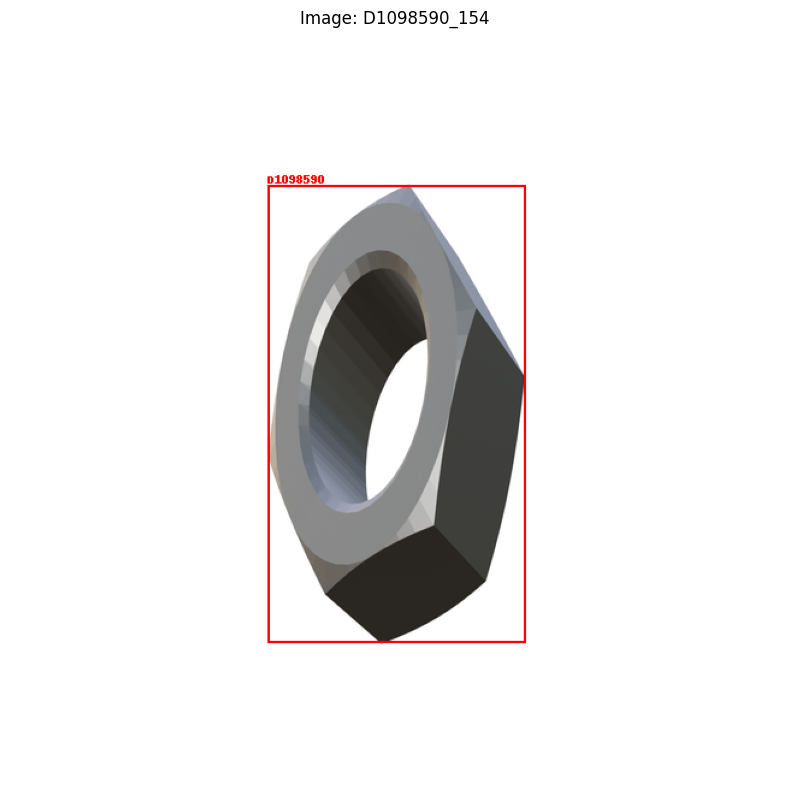

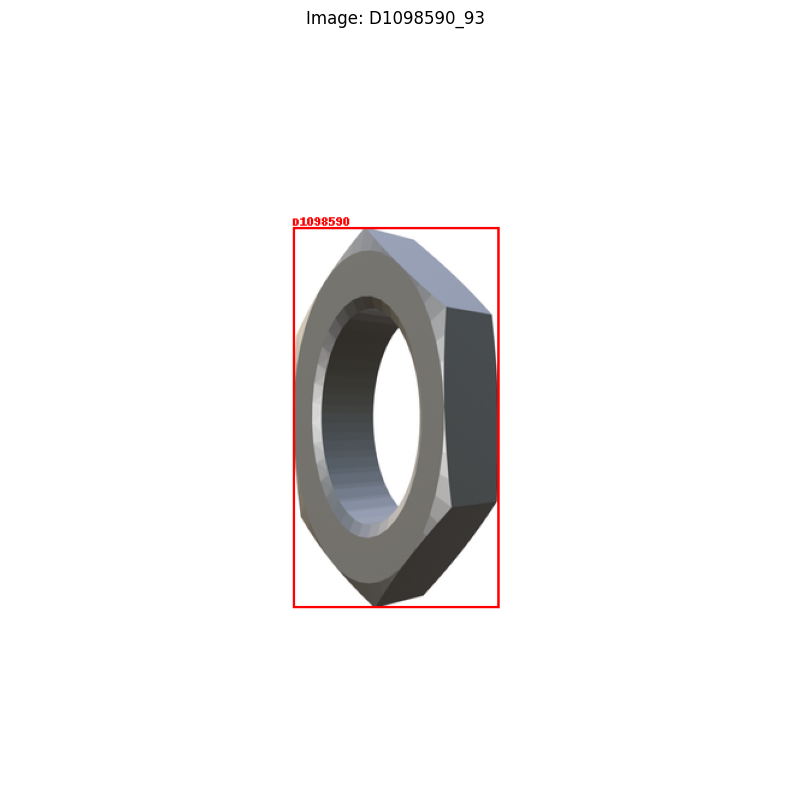

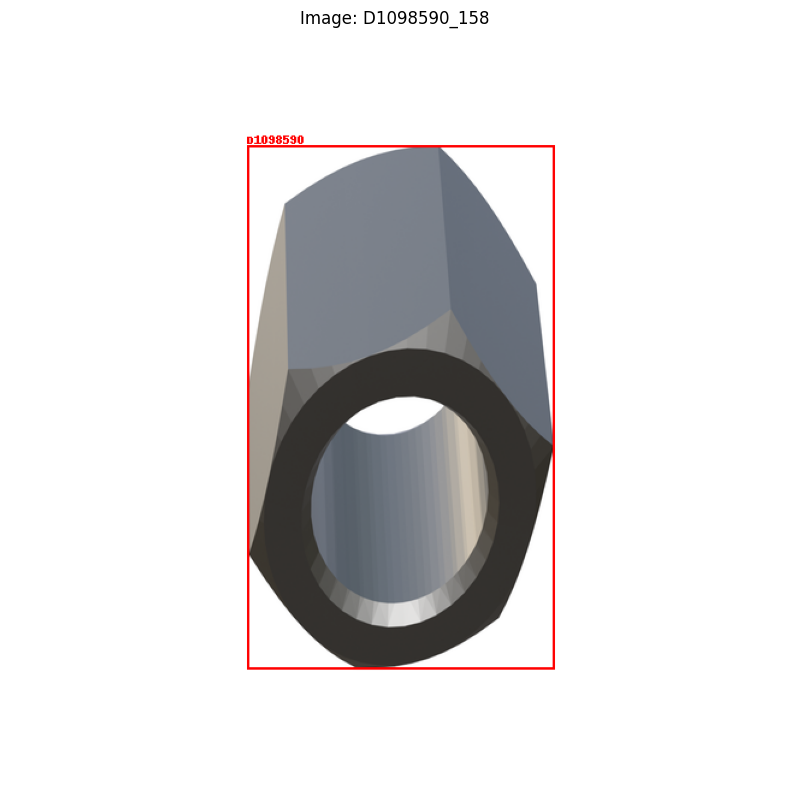

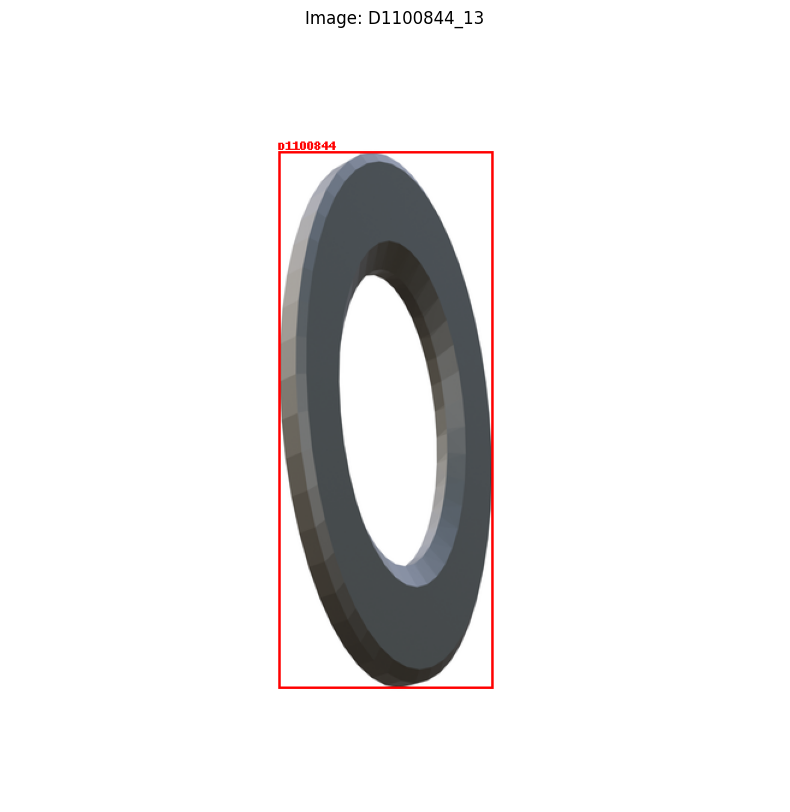

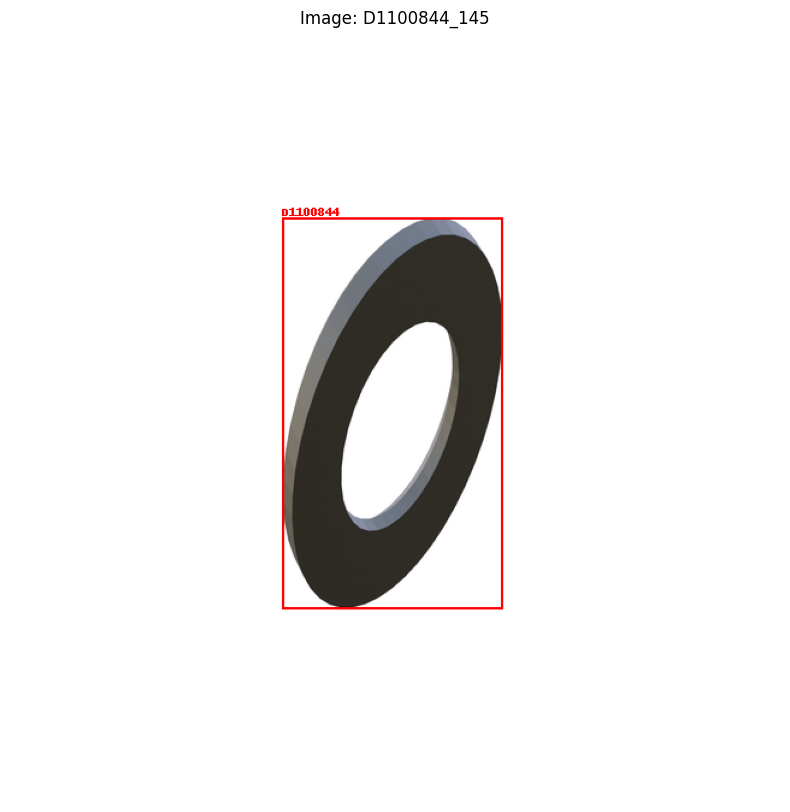

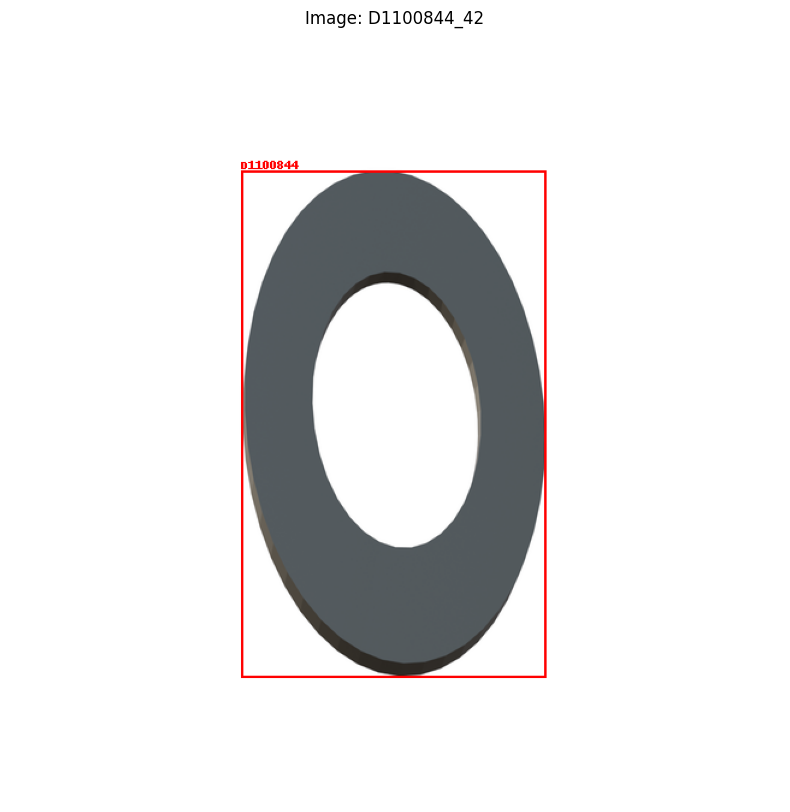

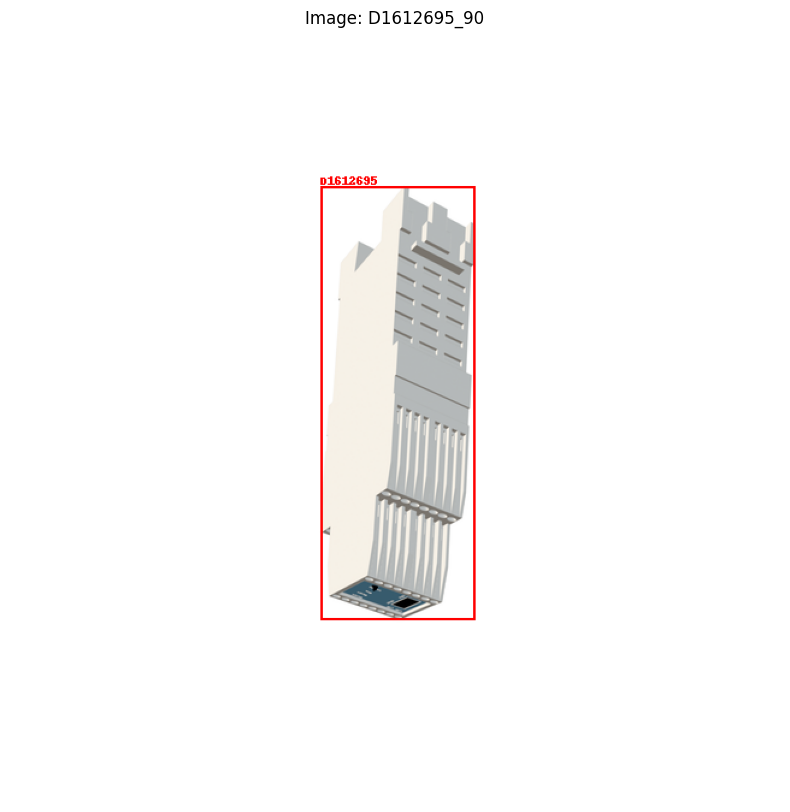

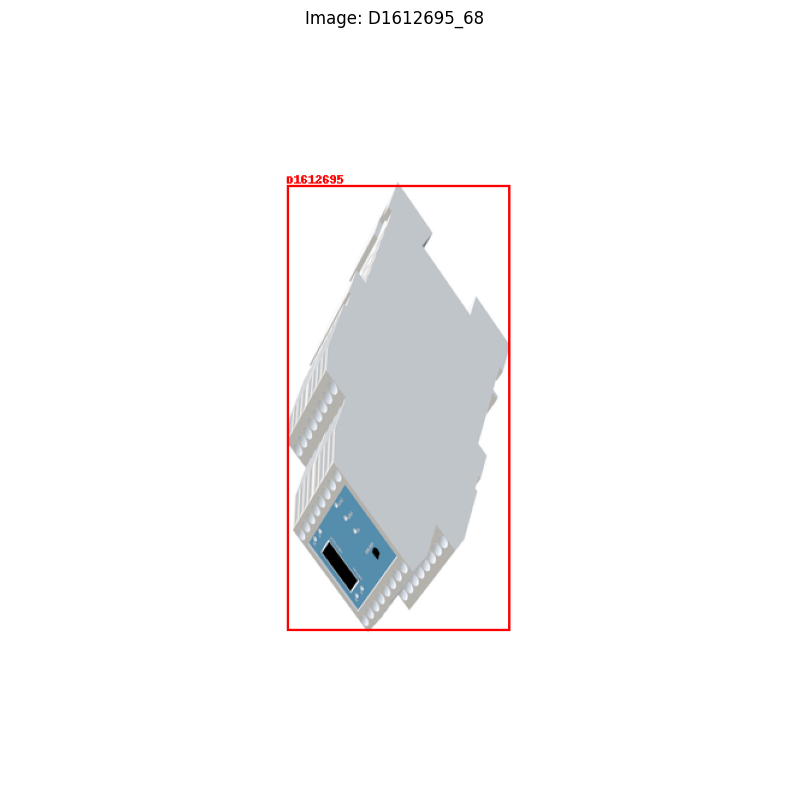

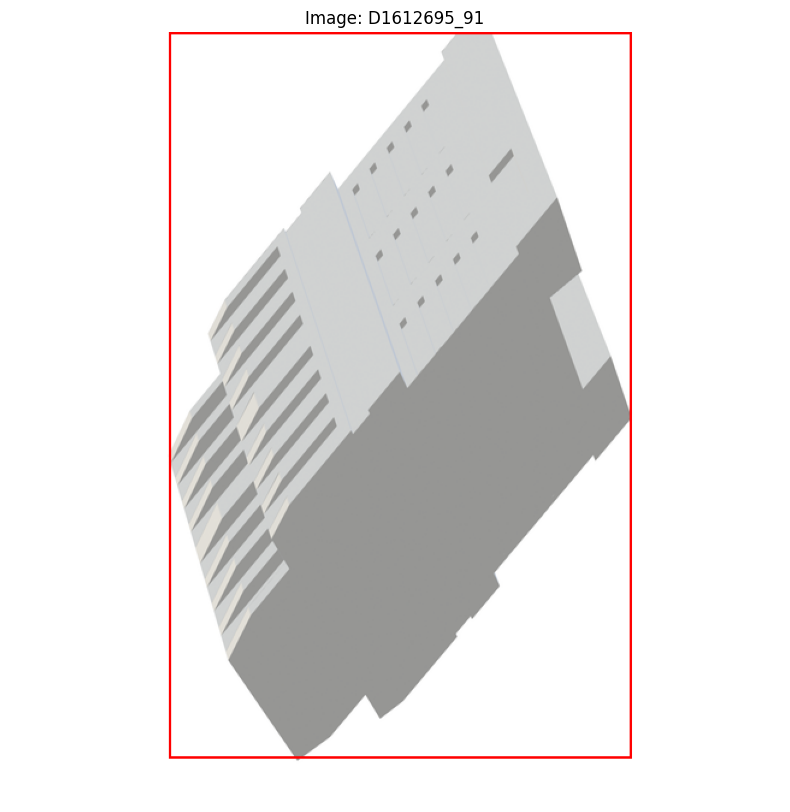

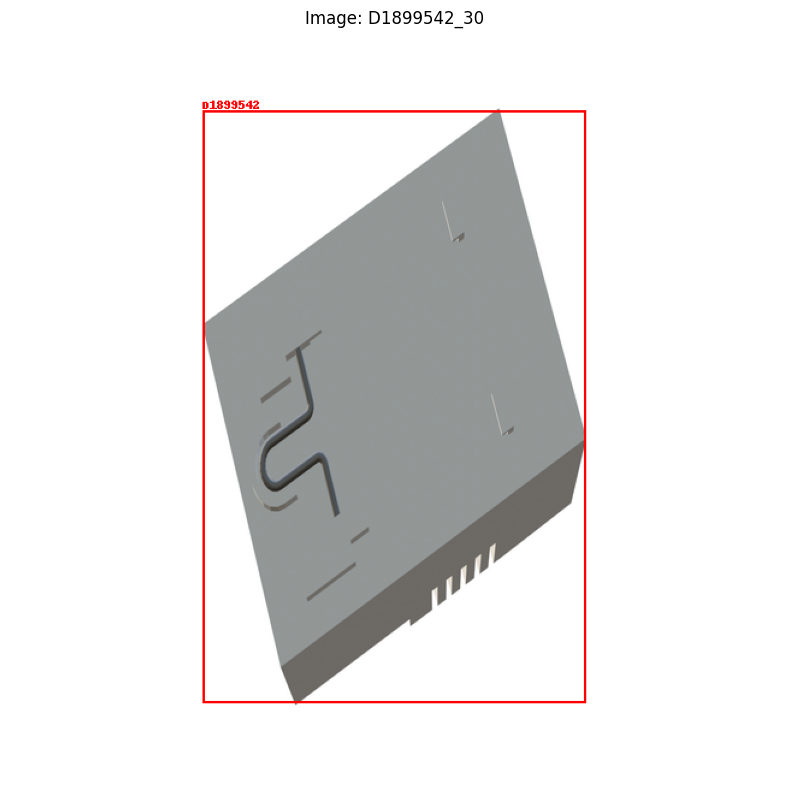

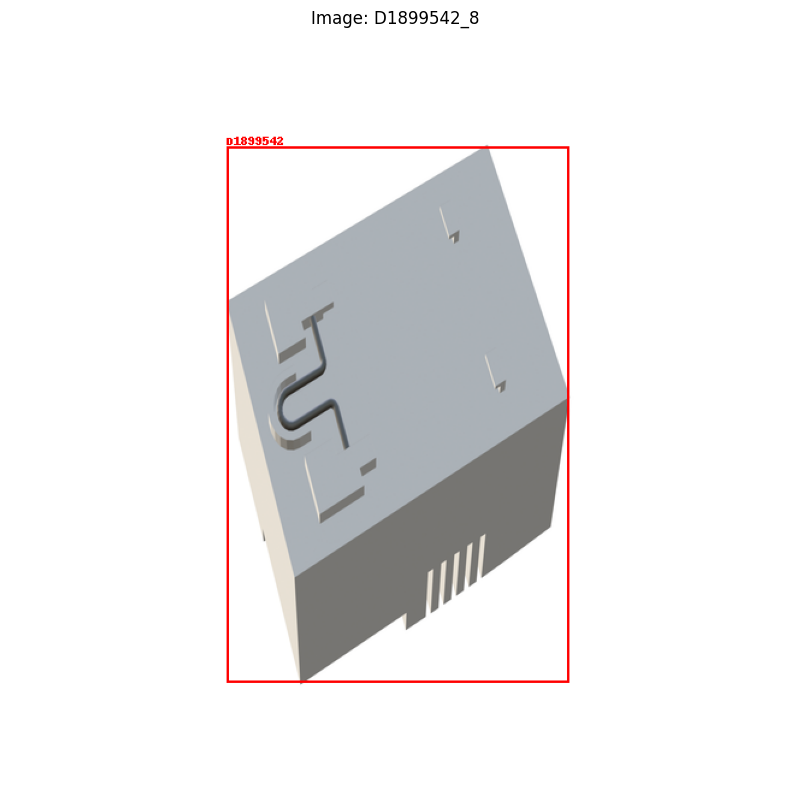

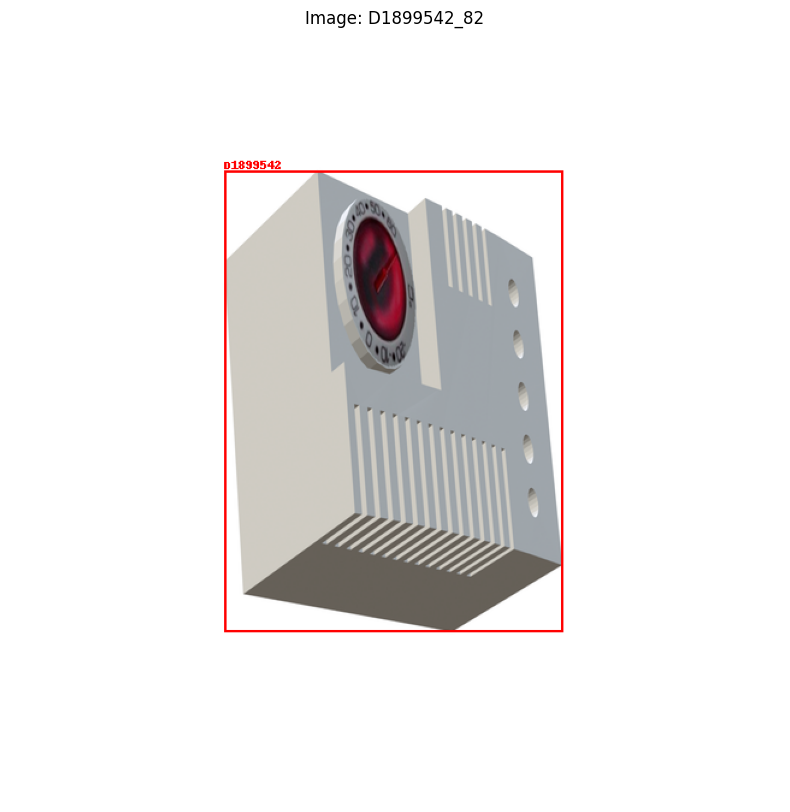

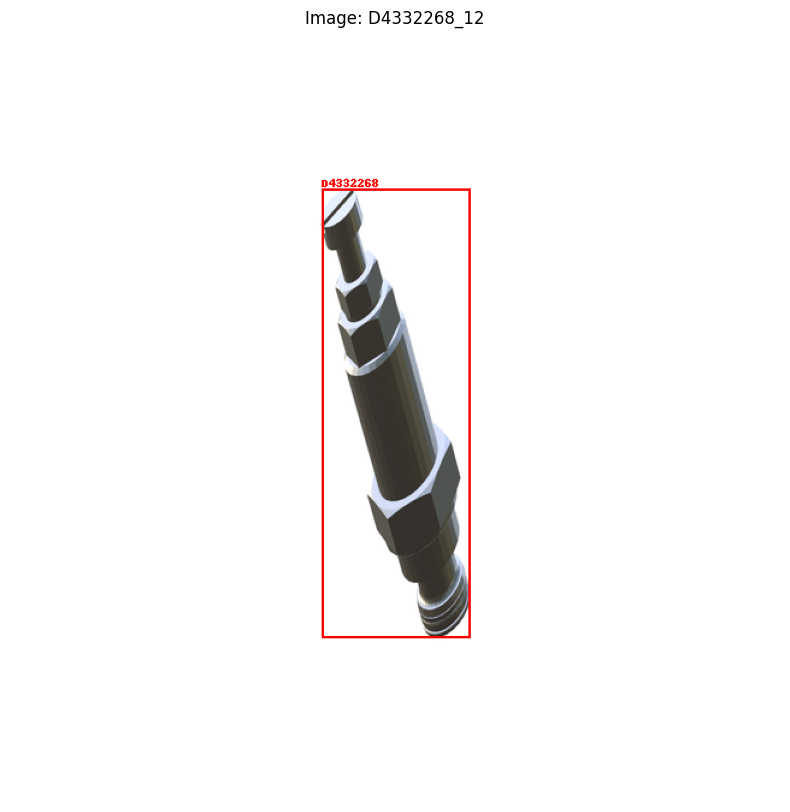

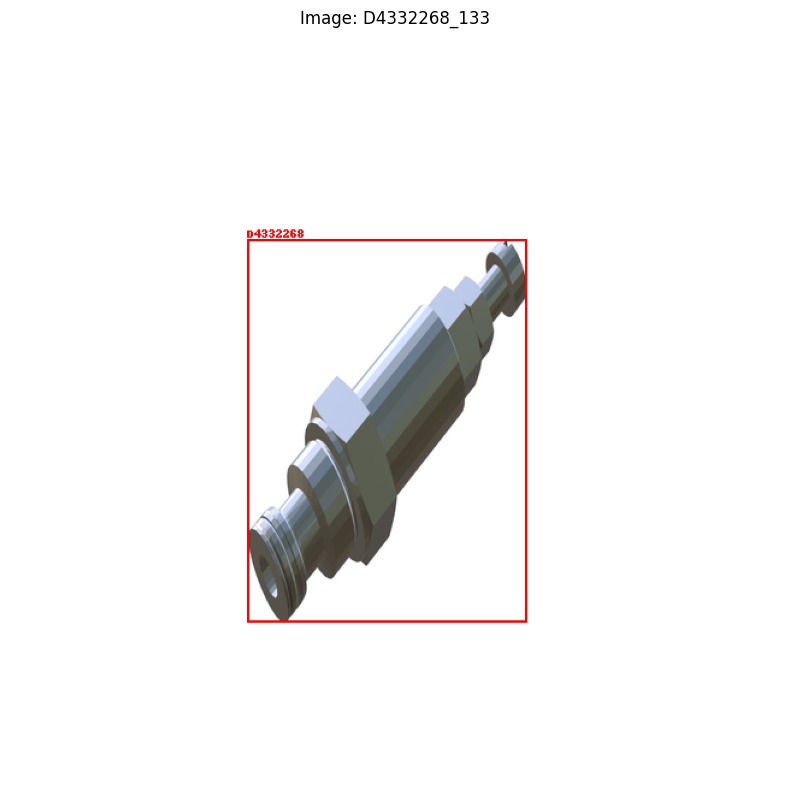

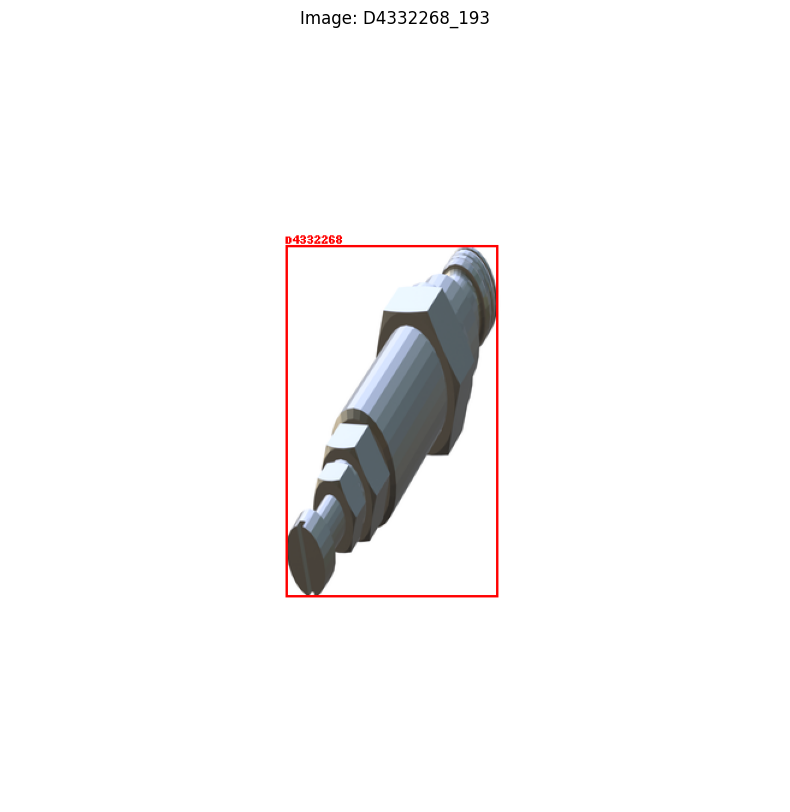

In [ ]:
import os
import random
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from collections import defaultdict

# Class mapping starting from 0
class_mapping = {
    'D1098590': 0,
    'D1100844': 1,
    'D1612695': 2,
    'D1899542': 3,
    'D4332268': 4,
}

# Reverse the class mapping for easier lookup by class index
reverse_class_mapping = {v: k for k, v in class_mapping.items()}

def parse_yolo_annotation(txt_file, img_width, img_height):
    boxes = []
    labels = []

    with open(txt_file, 'r') as f:
        for line in f:
            data = line.strip().split()
            try:
                label = int(data[0])
            except ValueError:
                print(f"Warning: Skipping invalid label '{data[0]}' in file {txt_file}")
                continue

            x_center = float(data[1]) * img_width
            y_center = float(data[2]) * img_height
            width = float(data[3]) * img_width
            height = float(data[4]) * img_height
            xmin = int(x_center - width / 2)
            ymin = int(y_center - height / 2)
            xmax = int(x_center + width / 2)
            ymax = int(y_center + height / 2)
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(label)

    return boxes, labels

def visualize_images_with_annotations(img_dir, inferred_dir, num_images_per_class=3):
    img_files = [f for f in os.listdir(img_dir) if f.endswith('.png')]
    class_to_files = defaultdict(list)

    # Group images by class based on filename
    for img_file in img_files:
        class_name_from_file = img_file[:8]
        if class_name_from_file in class_mapping:
            label = class_mapping[class_name_from_file]
            class_to_files[label].append(img_file)

    # Select random images for each class and sort by class order
    selected_files = []
    for label in sorted(class_to_files.keys()):
        files = class_to_files[label]
        selected_files.extend(random.sample(files, min(num_images_per_class, len(files))))

    # Load a font
    try:
        font = ImageFont.truetype("arial.ttf", 20)
    except IOError:
        font = ImageFont.load_default()

    # Visualize selected images with annotations
    for img_file in selected_files:
        base_name = img_file.replace('.png', '')
        inferred_file = base_name + '.txt'

        img_path = os.path.join(img_dir, img_file)
        inferred_path = os.path.join(inferred_dir, inferred_file)

        img = Image.open(img_path)
        img_width, img_height = img.size

        inferred_boxes, inferred_labels = parse_yolo_annotation(inferred_path, img_width, img_height)

        draw = ImageDraw.Draw(img)
        for box, label in zip(inferred_boxes, inferred_labels):
            xmin, ymin, xmax, ymax = box
            draw.rectangle([xmin, ymin, xmax, ymax], outline='red', width=2)
            class_name = reverse_class_mapping.get(label, "Unknown")
            text_position = (xmin, ymin - 10)
            draw.text(text_position, class_name, fill='red', font=font)

        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.title(f"Image: {base_name}")
        plt.axis('off')
        plt.show()

# Perform visualization
img_dir = '/content/Datasets/synthetic_testing'
inferred_dir = '/content/Datasets/synthetic_testing_results'

visualize_images_with_annotations(img_dir, inferred_dir)

### **REAL TESTING DATASET (Internet imagery):**

In [ ]:
# ANNOTATIONS INFERENCE:

from ultralytics import YOLO
import cv2
import os

# Load the pretrained YOLO model
model = YOLO('/content/gdrive/MyDrive/Colab Notebooks/Data/LOW COMPLEXITY - Fully trained model/YOLOv8l/full_trained_model_YOLOv8l_low_T4.pt')

# Path to the directory containing images
image_directory = '/content/Datasets/actual_testing'
output_directory = '/content/Datasets/actual_testing_results'

# Ensure output directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# List all image files in the directory
image_files = [f for f in os.listdir(image_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Process each image
for image_file in image_files:
    # Construct full image path
    image_path = os.path.join(image_directory, image_file)
    # Run inference on the image
    results = model(image_path)

    # Open a file to write the YOLO formatted annotations
    annotation_path = os.path.join(output_directory, image_file.rsplit('.', 1)[0] + '.txt')
    with open(annotation_path, 'w') as file:
        detections_found = False
        for result in results:
            if hasattr(result, 'boxes') and result.boxes.data.nelement() > 0:
                detections = result.boxes.data
                confidences = detections[:, 4]
                max_conf_index = confidences.argmax()
                best_detection = detections[max_conf_index]
                x1, y1, x2, y2, conf, cls_id = best_detection.int().tolist()

                # Normalize the bounding box coordinates
                img = cv2.imread(result.path)
                h, w, _ = img.shape
                x_center = ((x2 + x1) / 2) / w
                y_center = ((y2 + y1) / 2) / h
                width = (x2 - x1) / w
                height = (y2 - y1) / h

                # Write to file in YOLO format: class_id x_center y_center width height
                file.write(f"{cls_id} {x_center} {y_center} {width} {height}\n")
                detections_found = True

        if not detections_found:
            # Write "unidentified" if no detections were made
            file.write("unidentified\n")
            print(f"No bounding boxes found for {image_file}, wrote 'unidentified'.")


image 1/1 /content/Datasets/actual_testing/D1899542_4.png: 640x640 (no detections), 991.0ms
Speed: 20.3ms preprocess, 991.0ms inference, 1462.0ms postprocess per image at shape (1, 3, 640, 640)
No bounding boxes found for D1899542_4.png, wrote 'unidentified'.

image 1/1 /content/Datasets/actual_testing/D1899542_14.png: 640x448 1 D1899542, 574.2ms
Speed: 1.7ms preprocess, 574.2ms inference, 11.9ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /content/Datasets/actual_testing/D1098590_16.png: 544x640 1 D1899542, 647.0ms
Speed: 2.3ms preprocess, 647.0ms inference, 0.7ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /content/Datasets/actual_testing/D1612695_3.png: 416x640 1 D1612695, 536.3ms
Speed: 2.0ms preprocess, 536.3ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /content/Datasets/actual_testing/D1098590_9.png: 640x544 1 D1098590, 664.7ms
Speed: 1.7ms preprocess, 664.7ms inference, 0.9ms postprocess per image at shape (1, 3, 64

In [ ]:
import os
from collections import defaultdict

# Class mapping
class_mapping = {
    'D1098590': 0,
    'D1100844': 1,
    'D1612695': 2,
    'D1899542': 3,
    'D4332268': 4,
}

# Reverse the class mapping for easier lookup by class index
reverse_class_mapping = {v: k for k, v in class_mapping.items()}

def parse_yolo_annotation(txt_file):
  """Parse YOLO format annotation file to extract labels."""
    labels = []

    with open(txt_file, 'r') as f:
        for line in f:
            data = line.strip().split()
            try:
                label = int(data[0])
                labels.append(label)
            except ValueError:
                continue

    return labels

def compare_annotations(inferred_dir, image_dir):
  """Comparing inferred annotations with correct classes, calculating classification accuracy."""
    inferred_files = [f for f in os.listdir(inferred_dir) if f.endswith('.txt')]
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    total_files = len(image_files)
    correct_classifications = defaultdict(int)
    incorrect_classifications = defaultdict(int)
    undetected_classifications = defaultdict(int)
    classes = set()

    for image_file in image_files:
        base_name = os.path.splitext(image_file)[0]
        class_name_from_file = base_name[:8]
        inferred_file = base_name + '.txt'
        inferred_path = os.path.join(inferred_dir, inferred_file)

        if class_name_from_file not in class_mapping:
            continue

        expected_label = class_mapping[class_name_from_file]
        classes.add(expected_label)

        if not os.path.exists(inferred_path):
            undetected_classifications[expected_label] += 1
            continue

        inferred_labels = parse_yolo_annotation(inferred_path)

        if not inferred_labels:
            undetected_classifications[expected_label] += 1
            continue

        inferred_label = inferred_labels[0]  # assuming only one label per file

        if expected_label == inferred_label:
            correct_classifications[expected_label] += 1
        else:
            incorrect_classifications[expected_label] += 1

    # Calculate metrics
    overall_correct = sum(correct_classifications.values())
    overall_incorrect = sum(incorrect_classifications.values())
    overall_undetected = sum(undetected_classifications.values())

    # Print metrics
    for label in sorted(classes):
        class_name = reverse_class_mapping.get(label, "Unknown")
        total_classifications = correct_classifications[label] + incorrect_classifications[label] + undetected_classifications[label]
        classification_accuracy = (correct_classifications[label] / total_classifications) * 100 if total_classifications > 0 else 0
        print(f"Class {label} ({class_name}):")
        print(f"  Correct classifications: {correct_classifications[label]}")
        print(f"  Incorrect classifications: {incorrect_classifications[label]}")
        print(f"  Undetected classifications: {undetected_classifications[label]}")
        print(f"  Classification accuracy: {classification_accuracy:.2f}%")

    overall_accuracy = (overall_correct / total_files) * 100 if total_files > 0 else 0
    print("\nOverall:")
    print(f"  Total files: {total_files}")
    print(f"  Correct classifications: {overall_correct}")
    print(f"  Incorrect classifications: {overall_incorrect}")
    print(f"  Undetected classifications: {overall_undetected}")
    print(f"  Classification accuracy: {overall_accuracy:.2f}%")

# Perform comparison
inferred_annotations_dir = '/content/Datasets/actual_testing_results'
image_dir = '/content/Datasets/actual_testing'

compare_annotations(inferred_annotations_dir, image_dir)

Class 0 (D1098590):
  Correct classifications: 8
  Incorrect classifications: 5
  Undetected classifications: 7
  Classification accuracy: 40.00%
Class 1 (D1100844):
  Correct classifications: 9
  Incorrect classifications: 3
  Undetected classifications: 8
  Classification accuracy: 45.00%
Class 2 (D1612695):
  Correct classifications: 4
  Incorrect classifications: 0
  Undetected classifications: 1
  Classification accuracy: 80.00%
Class 3 (D1899542):
  Correct classifications: 13
  Incorrect classifications: 2
  Undetected classifications: 5
  Classification accuracy: 65.00%
Class 4 (D4332268):
  Correct classifications: 2
  Incorrect classifications: 15
  Undetected classifications: 3
  Classification accuracy: 10.00%

Overall:
  Total files: 85
  Correct classifications: 36
  Incorrect classifications: 25
  Undetected classifications: 24
  Classification accuracy: 42.35%


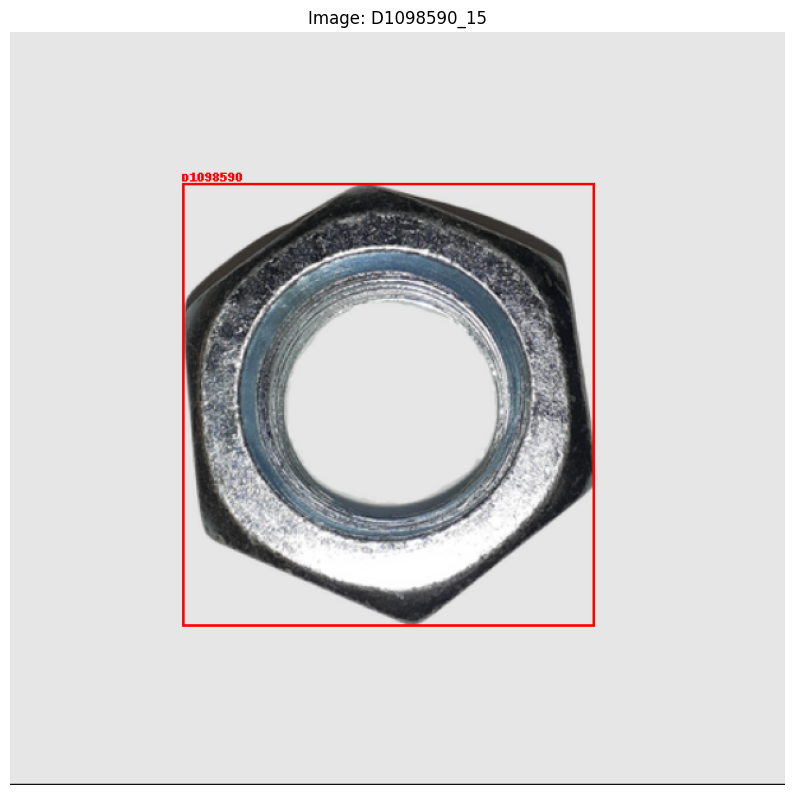

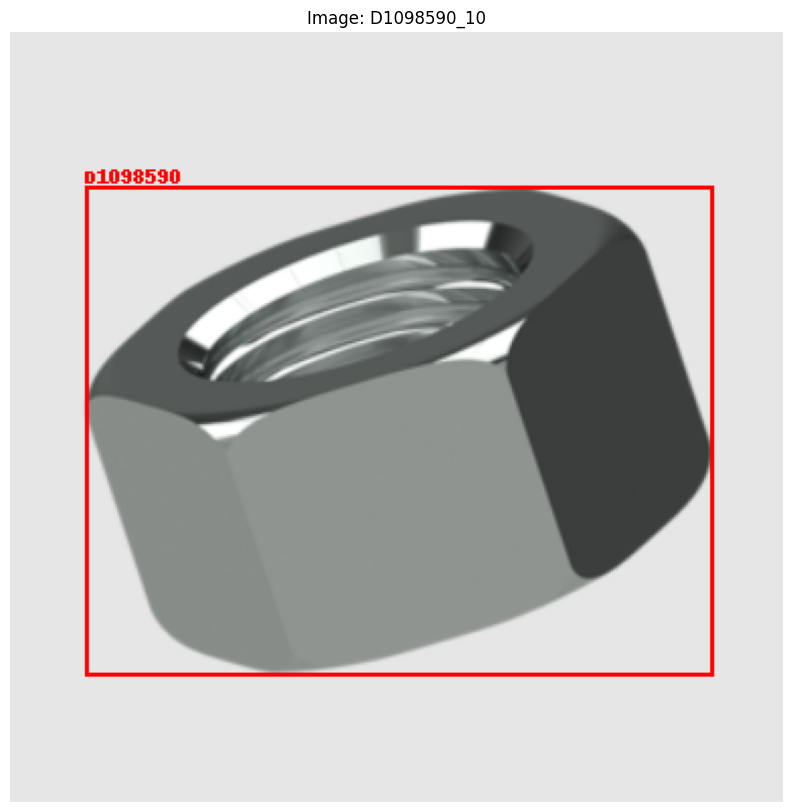

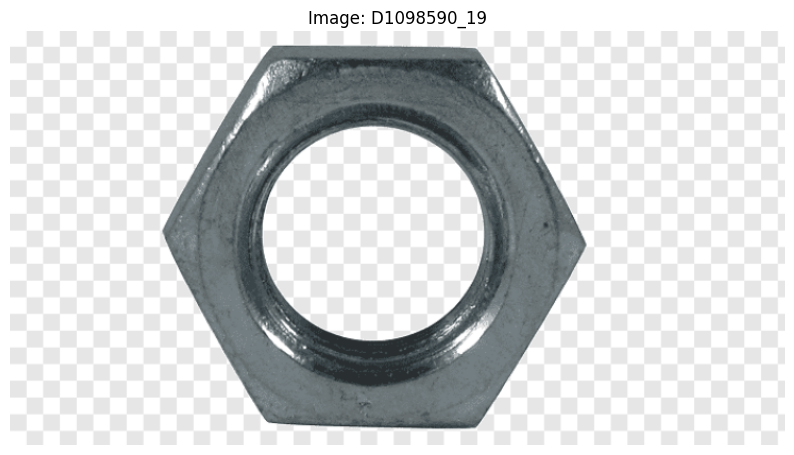

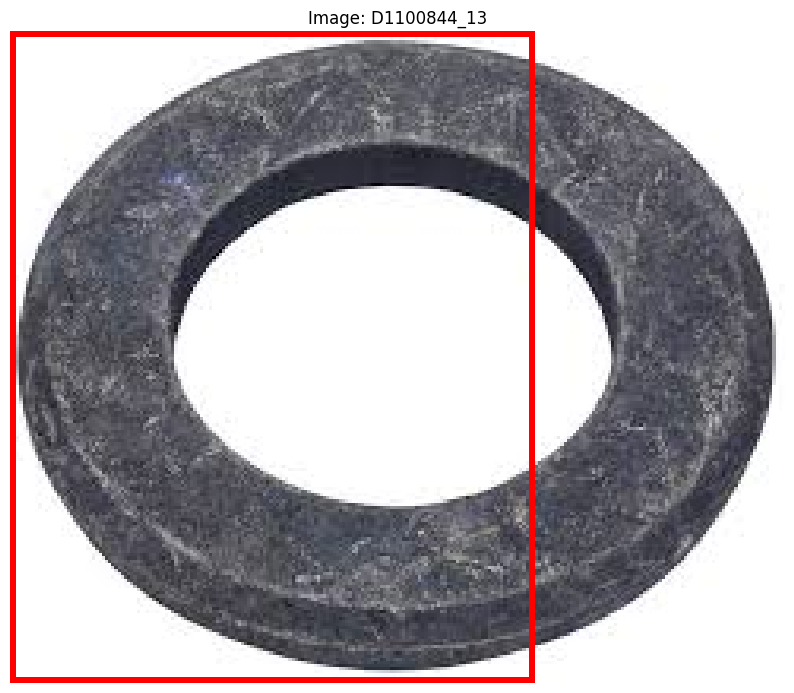

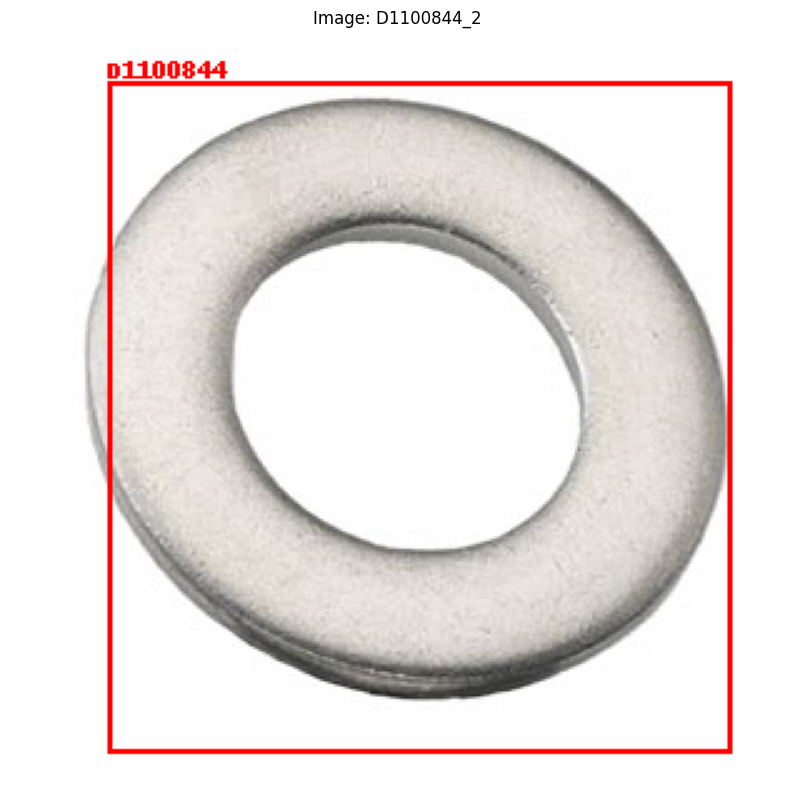

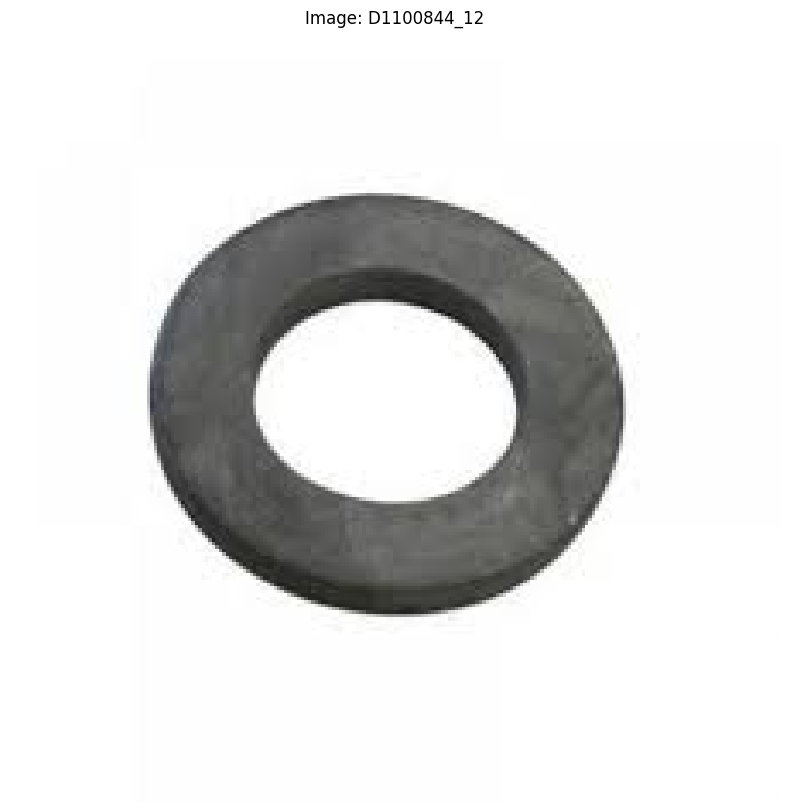

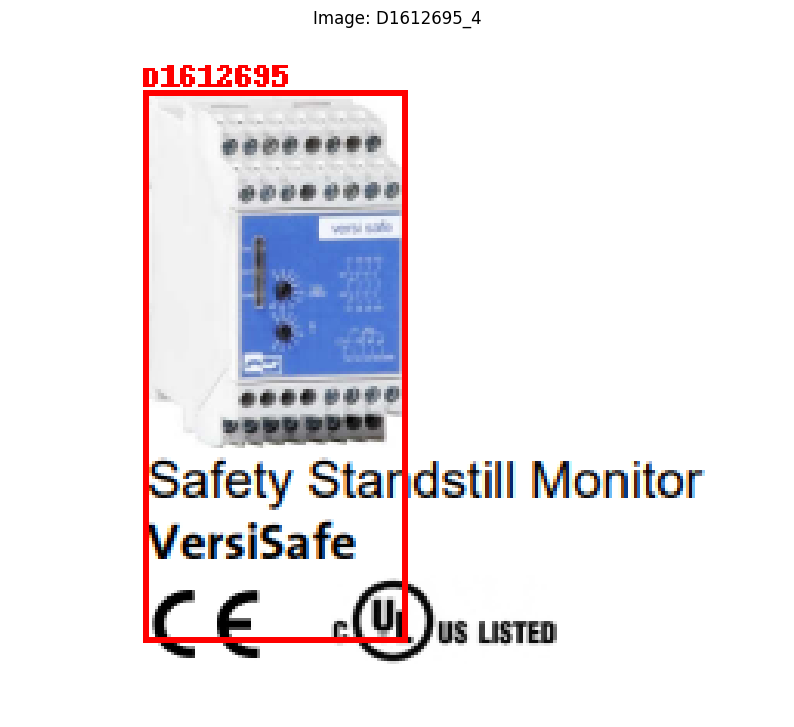

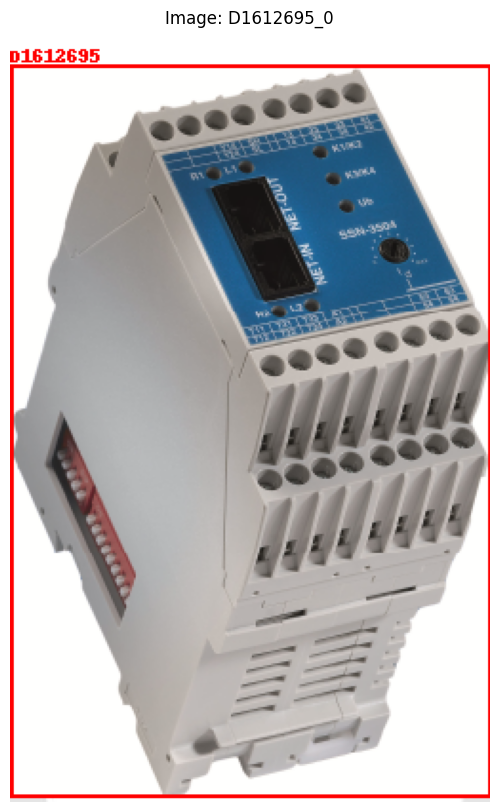

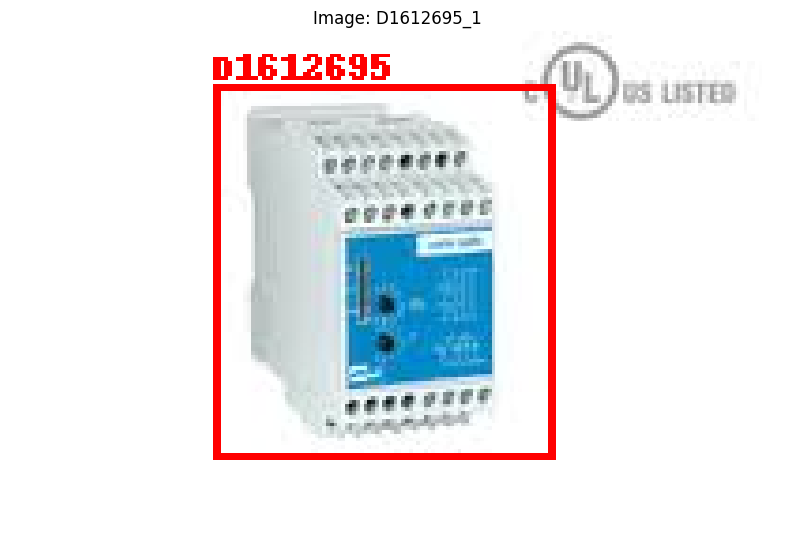

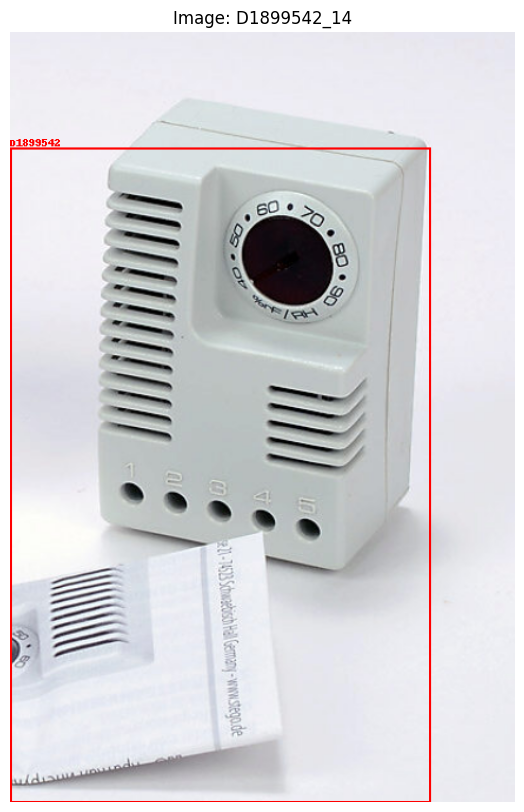

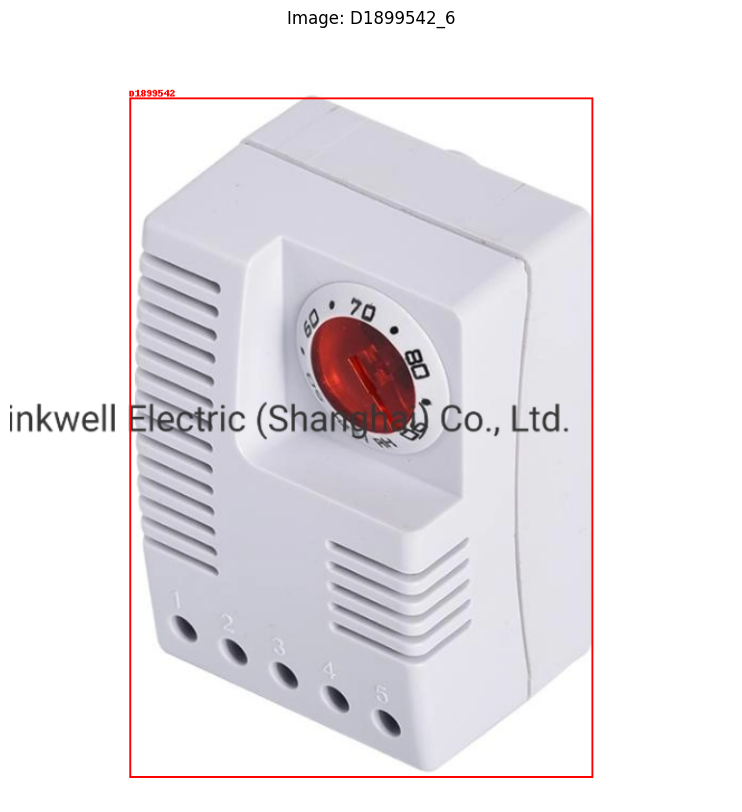

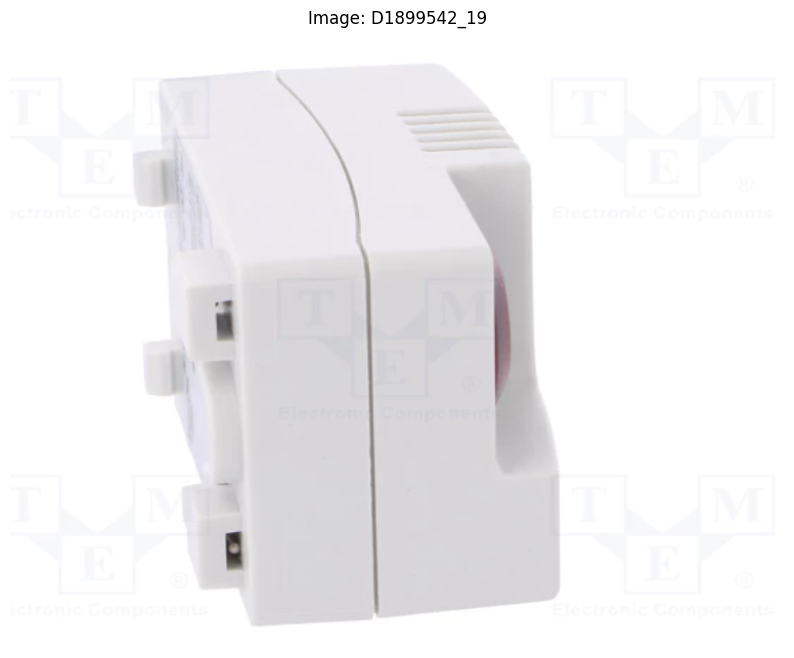

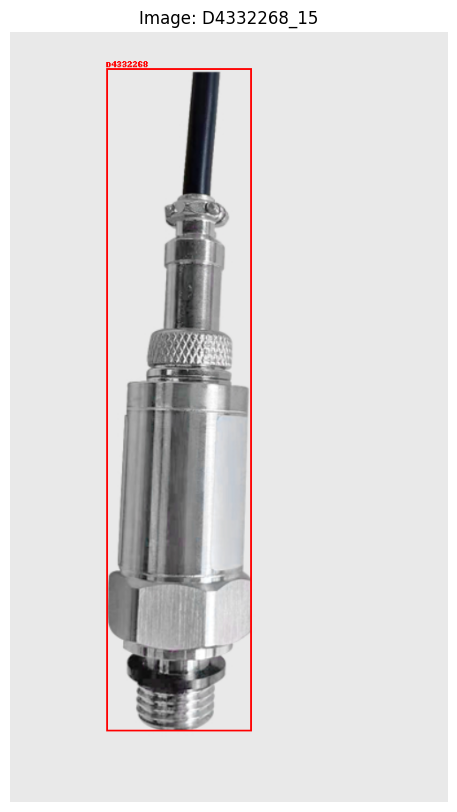

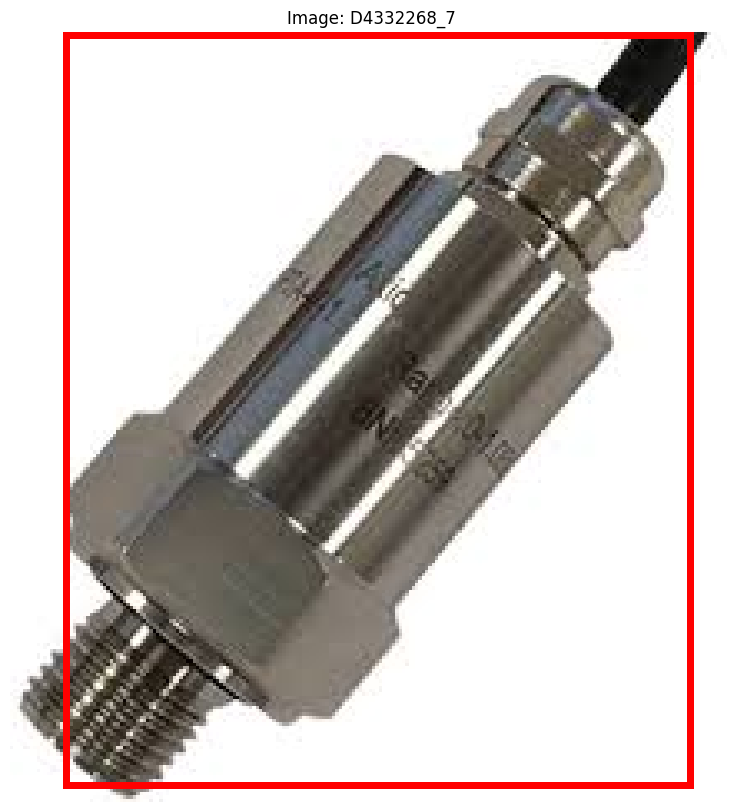

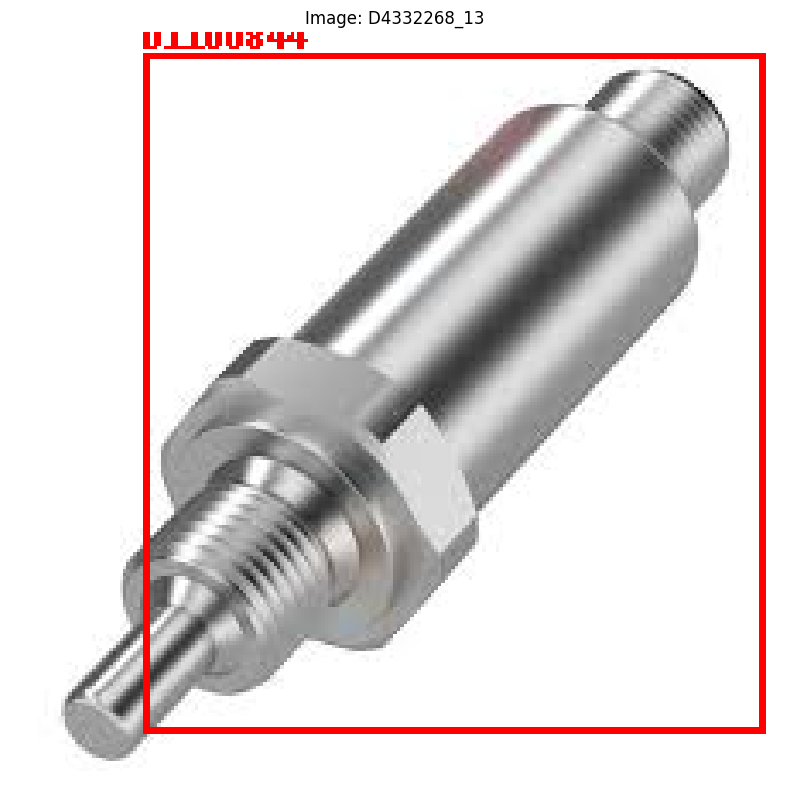

In [ ]:
import os
import random
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from collections import defaultdict

# Class mapping starting from 0
class_mapping = {
    'D1098590': 0,
    'D1100844': 1,
    'D1612695': 2,
    'D1899542': 3,
    'D4332268': 4,
}

# Reverse the class mapping for easier lookup by class index
reverse_class_mapping = {v: k for k, v in class_mapping.items()}

def parse_yolo_annotation(txt_file, img_width, img_height):
  """Parse YOLO format annotation file to extract labels."""
    boxes = []
    labels = []

    with open(txt_file, 'r') as f:
        for line in f:
            data = line.strip().split()
            try:
                label = int(data[0])
            except ValueError:
                print(f"Warning: Skipping invalid label '{data[0]}' in file {txt_file}")
                continue

            x_center = float(data[1]) * img_width
            y_center = float(data[2]) * img_height
            width = float(data[3]) * img_width
            height = float(data[4]) * img_height
            xmin = int(x_center - width / 2)
            ymin = int(y_center - height / 2)
            xmax = int(x_center + width / 2)
            ymax = int(y_center + height / 2)
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(label)

    return boxes, labels

def visualize_images_with_annotations(img_dir, inferred_dir, num_images_per_class=3):
    img_files = [f for f in os.listdir(img_dir) if f.endswith('.png')]
    class_to_files = defaultdict(list)

    # Group images by class based on filename
    for img_file in img_files:
        class_name_from_file = img_file[:8]
        if class_name_from_file in class_mapping:
            label = class_mapping[class_name_from_file]
            class_to_files[label].append(img_file)

    # Select random images for each class and sort by class order
    selected_files = []
    for label in sorted(class_to_files.keys()):
        files = class_to_files[label]
        selected_files.extend(random.sample(files, min(num_images_per_class, len(files))))

    # Load a font
    try:
        font = ImageFont.truetype("arial.ttf", 20)
    except IOError:
        font = ImageFont.load_default()

    # Visualize selected images with annotations
    for img_file in selected_files:
        base_name = img_file.replace('.png', '')
        inferred_file = base_name + '.txt'

        img_path = os.path.join(img_dir, img_file)
        inferred_path = os.path.join(inferred_dir, inferred_file)

        img = Image.open(img_path)
        img_width, img_height = img.size

        inferred_boxes, inferred_labels = parse_yolo_annotation(inferred_path, img_width, img_height)

        draw = ImageDraw.Draw(img)
        for box, label in zip(inferred_boxes, inferred_labels):
            xmin, ymin, xmax, ymax = box
            draw.rectangle([xmin, ymin, xmax, ymax], outline='red', width=2)
            class_name = reverse_class_mapping.get(label, "Unknown")
            text_position = (xmin, ymin - 10)
            draw.text(text_position, class_name, fill='red', font=font)

        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.title(f"Image: {base_name}")
        plt.axis('off')
        plt.show()

# Perform visualization
img_dir = '/content/Datasets/actual_testing'
inferred_dir = '/content/Datasets/actual_testing_results'

visualize_images_with_annotations(img_dir, inferred_dir)